# **Ölçek Özellikleri**

Verileriniz farklı değerlere ve hatta farklı ölçü birimlerine sahip olduğunda, bunları karşılaştırmak zor olabilir. Kilogramın metreyle karşılaştırılması ne anlama gelir? Ya da irtifanın zamanla karşılaştırılması?

Bu sorunun cevabı ölçeklendirmedir. Verileri, karşılaştırmayı kolaylaştıracak yeni değerlere ölçeklendirebiliriz.

Aşağıdaki tabloya bir göz atın; bu, çoklu regresyon bölümünde kullandığımız veri setinin aynısı , ancak bu sefer hacim sütununda cm³ yerine litre cinsinden değerler var (1000 yerine 1,0) .

Araba	Model	Hacim	Ağırlık	CO2
Toyota	Aygo	1.0	790	99
Mitsubishi	Uzay Yıldızı	1.2	1160	95
Skoda	Citigo	1.0	929	95
Fiat	500	0.9	865	90
Mini	Cooper	1.5	1140	105
VW	Yukarı!	1.0	929	105
Skoda	Fabia	1.4	1109	90
Mercedes	A Sınıfı	1.5	1365	92
Ford	Şenlik	1.5	1112	98
Audi	A1	1.6	1150	99
Hyundai	I20	1.1	980	99
Suzuki	Süratli	1.3	990	101
Ford	Şenlik	1.0	1112	99
Honda	Civic	1.6	1252	94
Hyundai	I30	1.6	1326	97
Opel	Astra	1.6	1330	97
BMW	1	1.6	1365	99
Mazda	3	2.2	1280	104
Skoda	Ani	1.6	1119	104
Ford	Odak	2.0	1328	105
Ford	Mondeo	1.6	1584	94
Opel	Nişan	2.0	1428	99
Mercedes	C Sınıfı	2.1	1365	99
Skoda	Octavia	1.6	1415	99
Volvo	S60	2.0	1415	99
Mercedes	CLA	1.5	1465	102
Audi	A4	2.0	1490	104
Audi	A6	2.0	1725	114
Volvo	V70	1.6	1523	109
BMW	5	2.0	1705	114
Mercedes	E-Sınıfı	2.1	1605	115
Volvo	XC70	2.0	1746	117
Ford	B-Max	1.6	1235	104
BMW	2	1.6	1390	108
Opel	Zafira	1.6	1405	109
Mercedes	SLK	2.5	1395	120
Hacim 1.0 ile ağırlık 790'ı karşılaştırmak zor olabilir, ancak ikisini de karşılaştırılabilir değerlere ölçeklendirirsek, bir değerin diğerine göre ne kadar büyük olduğunu kolayca görebiliriz.

Verileri ölçeklendirmek için farklı yöntemler vardır; bu eğitimde standardizasyon adı verilen bir yöntemi kullanacağız.

Standardizasyon yöntemi şu formülü kullanır:

z = (x - u) / s

Burada z, yeni değer, xorijinal değer, uortalama ve sstandart sapma yer almaktadır.

Yukarıdaki veri setinden ağırlık sütununu alırsanız , ilk değer 790'dır ve ölçeklendirilmiş değer şu olacaktır:

(790 - 1292.23) / 238.74 = -2.1
Yukarıdaki veri setinden hacim sütununu alırsanız , ilk değer 1,0'dır ve ölçeklendirilmiş değer şu olacaktır:

(1.0 - 1.61) / 0.38 = -1.59

Artık 790'ı 1.0 ile karşılaştırmak yerine -2.1'i -1.59 ile karşılaştırabilirsiniz.

Bunu manuel olarak yapmanıza gerek yok, Python'ın sklearn modülünde StandardScaler() veri kümelerini dönüştürmek için yöntemler içeren bir Scaler nesnesi döndüren bir yöntem bulunmaktadır.

In [2]:
#Ağırlık ve Hacim sütunlarındaki tüm değerleri ölçeklendirin:

import pandas
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

df = pandas.read_csv("data.csv")

X = df[['Weight', 'Volume']]

scaledX = scale.fit_transform(X)

print(scaledX)

[[-2.10389253 -1.59336644]
 [-0.55407235 -1.07190106]
 [-1.52166278 -1.59336644]
 [-1.78973979 -1.85409913]
 [-0.63784641 -0.28970299]
 [-1.52166278 -1.59336644]
 [-0.76769621 -0.55043568]
 [ 0.3046118  -0.28970299]
 [-0.7551301  -0.28970299]
 [-0.59595938 -0.0289703 ]
 [-1.30803892 -1.33263375]
 [-1.26615189 -0.81116837]
 [-0.7551301  -1.59336644]
 [-0.16871166 -0.0289703 ]
 [ 0.14125238 -0.0289703 ]
 [ 0.15800719 -0.0289703 ]
 [ 0.3046118  -0.0289703 ]
 [-0.05142797  1.53542584]
 [-0.72580918 -0.0289703 ]
 [ 0.14962979  1.01396046]
 [ 1.2219378  -0.0289703 ]
 [ 0.5685001   1.01396046]
 [ 0.3046118   1.27469315]
 [ 0.51404696 -0.0289703 ]
 [ 0.51404696  1.01396046]
 [ 0.72348212 -0.28970299]
 [ 0.8281997   1.01396046]
 [ 1.81254495  1.01396046]
 [ 0.96642691 -0.0289703 ]
 [ 1.72877089  1.01396046]
 [ 1.30990057  1.27469315]
 [ 1.90050772  1.01396046]
 [-0.23991961 -0.0289703 ]
 [ 0.40932938 -0.0289703 ]
 [ 0.47215993 -0.0289703 ]
 [ 0.4302729   2.31762392]]


# **Sonuç:**

Dikkat ederseniz, ilk iki değer -2.1 ve -1.59'dur ve bu değerler hesaplamalarımızla örtüşmektedir:

CO2 Değerlerini Tahmin Etme
Çoklu Regresyon bölümündeki görev, yalnızca ağırlığını ve hacmini bildiğiniz bir arabanın CO2 emisyonunu tahmin etmekti.

Veri seti ölçeklendirildiğinde, değerleri tahmin ederken de bu ölçeği kullanmanız gerekecektir:

In [5]:
#2300 kilogram ağırlığındaki 1,3 litrelik bir otomobilin CO2 emisyonunu tahmin edin:

import pandas
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

df = pandas.read_csv("data.csv")

X = df[['Weight', 'Volume']]
y = df['CO2']

scaledX = scale.fit_transform(X)

regr = linear_model.LinearRegression()
regr.fit(scaledX, y)

scaled = scale.transform([[2300, 1.3]])

predictedCO2 = regr.predict([scaled[0]])
print(predictedCO2)


[97.07204485]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# **Modelinizi Değerlendirin**
Makine öğreniminde, önceki bölümde olduğu gibi, bir arabanın ağırlığını ve motor hacmini bildiğimizde CO2 emisyonunu tahmin etmek için modeller oluştururuz.

Modelin yeterince iyi olup olmadığını ölçmek için, Eğitim/Test adı verilen bir yöntem kullanabiliriz.

Eğitim/Test nedir?
Eğitim/Test, modelinizin doğruluğunu ölçmek için kullanılan bir yöntemdir.

Buna "Eğitim/Test" denmesinin nedeni, veri setini iki ayrı sete ayırmanızdır: bir eğitim seti ve bir test seti.

%80'i eğitim, %20'si ise test için.

Modeli eğitim veri setini kullanarak eğitiyorsunuz .

Modeli test veri setini kullanarak test edersiniz .

Modeli eğitmek, modeli oluşturmak anlamına gelir.

Modeli test etmek, modelin doğruluğunu test etmek anlamına gelir.

Bir Veri Kümesiyle Başlayın
Test etmek istediğiniz veri setiyle başlayın.

Veri setimiz, bir mağazadaki 100 müşteriyi ve onların alışveriş alışkanlıklarını göstermektedir.

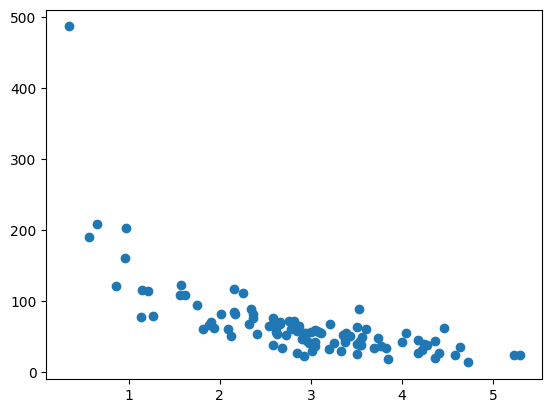

In [8]:
import numpy
import matplotlib.pyplot as plt
numpy.random.seed(2)

x = numpy.random.normal(3, 1, 100)
y = numpy.random.normal(150, 40, 100) / x

plt.scatter(x, y)
plt.show()

Eğitim/Test olarak ikiye ayrıldı

Eğitim veri seti, orijinal verilerin %80'inin rastgele bir seçimi olmalıdır.

Test seti kalan %20'lik kısmı oluşturmalıdır.



In [9]:
#
train_x = x[:80]
train_y = y[:80]

test_x = x[80:]
test_y = y[80:]

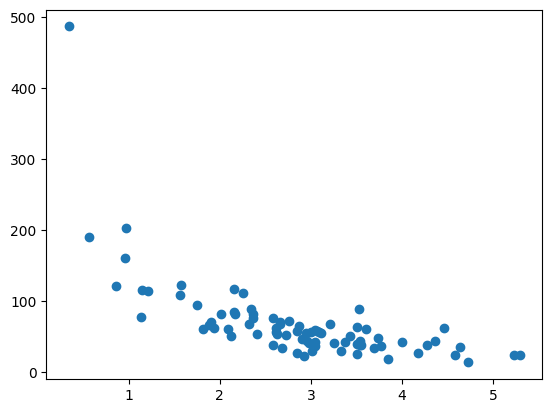

In [10]:
plt.scatter(train_x, train_y)
plt.show()

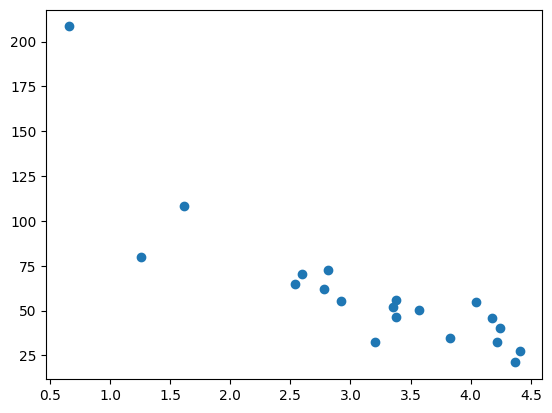

In [11]:
#Test setinin tamamen farklı olmadığından emin olmak için, test setine de bir göz atacağız.
#Test veri seti de orijinal veri setine benziyor:

plt.scatter(test_x, test_y)
plt.show()

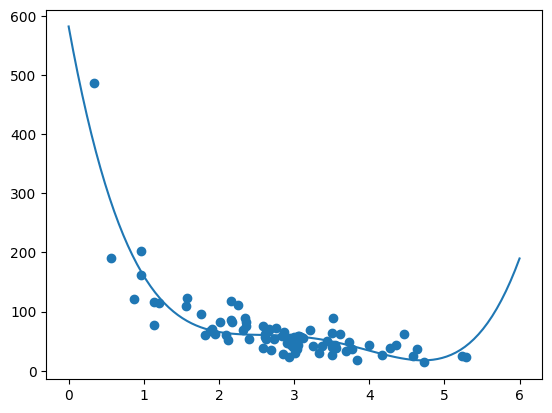

In [12]:
#Veri noktaları üzerinden bir polinom regresyon doğrusu çizin:

import numpy
import matplotlib.pyplot as plt
numpy.random.seed(2)

x = numpy.random.normal(3, 1, 100)
y = numpy.random.normal(150, 40, 100) / x

train_x = x[:80]
train_y = y[:80]

test_x = x[80:]
test_y = y[80:]

mymodel = numpy.poly1d(numpy.polyfit(train_x, train_y, 4))

myline = numpy.linspace(0, 6, 100)

plt.scatter(train_x, train_y)
plt.plot(myline, mymodel(myline))
plt.show()

Sonuç, veri setinin polinom regresyonuna uyduğu yönündeki önerimi destekleyebilir, ancak veri setinin dışındaki değerleri tahmin etmeye çalışırsak bazı garip sonuçlar elde edebiliriz. Örnek: çizgi, bir müşterinin mağazada 6 dakika geçirmesinin 200 değerinde bir alışveriş yapacağını gösteriyor. Bu muhtemelen aşırı uyumun bir işaretidir.

Peki ya R-kare değeri? R-kare değeri, veri setimin modele ne kadar iyi uyduğunun iyi bir göstergesidir.

# **R2**
R2 olarak da bilinen R-kareyi hatırlıyor musunuz?

Bu, x ekseni ile y ekseni arasındaki ilişkiyi ölçer ve değeri 0 ile 1 arasında değişir; 0 hiçbir ilişki olmadığını, 1 ise tamamen ilişkili olduğunu gösterir.

Sklearn modülünde r2_score() bu ilişkiyi bulmamıza yardımcı olacak bir yöntem bulunmaktadır.

Bu durumda, bir müşterinin mağazada geçirdiği dakika sayısı ile harcadığı para miktarı arasındaki ilişkiyi ölçmek istiyoruz.

In [14]:
#Eğitim verilerim polinom regresyonuna ne kadar iyi uyuyor?

import numpy
from sklearn.metrics import r2_score
numpy.random.seed(2)

x = numpy.random.normal(3, 1, 100)
y = numpy.random.normal(150, 40, 100) / x

train_x = x[:80]
train_y = y[:80]

test_x = x[80:]
test_y = y[80:]

mymodel = numpy.poly1d(numpy.polyfit(train_x, train_y, 4))

r2 = r2_score(train_y, mymodel(train_x))

print(r2)


0.79886455446298


Test Setini Getirin

Şimdi, en azından eğitim verileri söz konusu olduğunda, kabul edilebilir bir model oluşturduk.

Şimdi de modeli test verileriyle de test ederek aynı sonucu verip vermediğini görmek istiyoruz.

In [15]:
#Test verilerini kullanarak R2 skorunu bulalım:

import numpy
from sklearn.metrics import r2_score
numpy.random.seed(2)

x = numpy.random.normal(3, 1, 100)
y = numpy.random.normal(150, 40, 100) / x

train_x = x[:80]
train_y = y[:80]

test_x = x[80:]
test_y = y[80:]

mymodel = numpy.poly1d(numpy.polyfit(train_x, train_y, 4))

r2 = r2_score(test_y, mymodel(test_x))

print(r2)

0.8086921460343566


Not: 0.809 sonucu, modelin test kümesine de uyduğunu ve modeli gelecekteki değerleri tahmin etmek için kullanabileceğimizden emin olduğumuzu göstermektedir.

In [17]:
#Bir müşteri, mağazada 5 dakika kalırsa ne kadar para harcayacak?
#Örnekte, müşterinin 22,88 dolar harcayacağı tahmin ediliyor ve bu da diyagramla örtüşüyor gibi görünüyor:

print(mymodel(5))

22.8796259181172


# **Karar Ağacı**
Bu bölümde size "Karar Ağacı" oluşturmayı göstereceğiz. Karar Ağacı bir akış şemasıdır ve önceki deneyimlere dayanarak karar vermenize yardımcı olabilir.

Örnekte, bir kişi komedi gösterisine gidip gitmemeye karar vermeye çalışacaktır.

Neyse ki, örnek olarak verdiğimiz kişi, şehirde her komedi gösterisi olduğunda kayıt yaptırmış, komedyen hakkında bazı bilgiler kaydetmiş ve gösteriye gidip gitmediğini de belirtmiş.

Yaş	Deneyim	Rütbe	Milliyet	Gitmek
36	10	9	Birleşik Krallık	HAYIR
42	12	4	Amerika	HAYIR
23	4	6	N	HAYIR
52	4	4	Amerika	HAYIR
43	21	8	Amerika	EVET
44	14	5	Birleşik Krallık	HAYIR
66	3	7	N	EVET
35	14	9	Birleşik Krallık	EVET
52	13	7	N	EVET
35	5	9	N	EVET
24	3	5	Amerika	HAYIR
18	3	7	Birleşik Krallık	EVET
45	9	9	Birleşik Krallık	EVET
Şimdi, bu veri setine dayanarak, Python, yeni gösterilerden hangilerinin izlenmeye değer olduğuna karar vermek için kullanılabilecek bir karar ağacı oluşturabilir.



In [19]:
#Veri setini okuyun ve yazdırın:

#import pandas

#df = pandas.read_csv("data.csv")

#print(df)

Karar ağacı oluşturmak için tüm verilerin sayısal olması gerekir.

'Uyruk' ve 'Git' sütunlarındaki sayısal olmayan değerleri sayısal değerlere dönüştürmemiz gerekiyor.

map()Pandas'ın, değerlerin nasıl dönüştürüleceğine dair bilgi içeren bir sözlük alan bir yöntemi vardır .

{'UK': 0, 'USA': 1, 'N': 2}

Bu, 'UK' değerini 0'a, 'USA' değerini 1'e ve 'N' değerini 2'ye dönüştür anlamına gelir.

In [20]:
#Metin değerlerini sayısal değerlere dönüştürün:

#d = {'UK': 0, 'USA': 1, 'N': 2}
#df['Nationality'] = df['Nationality'].map(d)
#d = {'YES': 1, 'NO': 0}
#df['Go'] = df['Go'].map(d)

#print(df)

Ardından özellik sütunlarını hedef sütundan ayırmamız gerekiyor .

Özellik sütunları, tahmin yapmaya çalıştığımız sütunlardır ve hedef sütun ise tahmin etmeye çalıştığımız değerleri içeren sütundur.

In [ ]:
#XÖzellik sütunları, yhedef sütun ise şöyledir:

features = ['Age', 'Experience', 'Rank', 'Nationality']

X = df[features]
y = df['Go']

print(X)
print(y)

Şimdi gerçek karar ağacını oluşturabilir ve detaylarımız ile uyumlu hale getirebiliriz. İhtiyacımız olan modülleri içe aktararak başlayalım:

In [ ]:
#Karar Ağacı oluşturun ve görüntüleyin:

#import pandas
#from sklearn import tree
#from sklearn.tree import DecisionTreeClassifier
#import matplotlib.pyplot as plt

#df = pandas.read_csv("data.csv")

#d = {'UK': 0, 'USA': 1, 'N': 2}
#df['Nationality'] = df['Nationality'].map(d)
#d = {'YES': 1, 'NO': 0}
#df['Go'] = df['Go'].map(d)

#features = ['Age', 'Experience', 'Rank', 'Nationality']

#X = df[features]
#y = df['Go']

#dtree = DecisionTreeClassifier()
#dtree = dtree.fit(X, y)

#tree.plot_tree(dtree, feature_names=features)

Sonuç Açıklaması

Karar ağacı, daha önceki kararlarınızı kullanarak bir komedyen gösterisine gitmek isteyip istemeyeceğinizin olasılığını hesaplar.

Karar ağacının farklı yönlerini inceleyelim:


Rank <= 6.5Bu, 6,5 veya daha düşük puan alan tüm komedyenlerin Trueoku (sola) doğru, geri kalanların ise Falseoku (sağa) doğru takip edeceği anlamına gelir.

gini = 0.497Bu, bölme işleminin kalitesini ifade eder ve her zaman 0,0 ile 0,5 arasında bir sayıdır; 0,0 tüm örneklerin aynı sonucu aldığını, 0,5 ise bölme işleminin tam ortada yapıldığını gösterir.

samples = 13Bu, karar verme sürecinin bu aşamasında geriye 13 komedyenin kaldığı anlamına geliyor; bu da ilk aşama olduğu için hepsinin katıldığı anlamına geliyor.

value = [6, 7]Bu, 13 komedyenden 6'sının "HAYIR", 7'sinin ise "ONAY" alacağı anlamına geliyor.

Gini

Örnekleri bölmenin birçok yolu vardır, bu eğitimde GINI yöntemini kullanacağız.

Gini yöntemi şu formülü kullanır:

Gini = 1 - (x/n)2 - (y/n)2

Burada x, olumlu yanıtların ("GO") sayısı, nörnek sayısı ve yolumsuz yanıtların ("NO") sayısı yer almaktadır; bu da bize şu hesaplamayı verir:

1 - (7 / 13)2 - (6 / 13)2 = 0.497

Bir sonraki adımda iki kutu bulunur; bir kutu 'Sıralaması' 6,5 veya daha düşük olan komedyenler için, diğer kutu ise geri kalanlar içindir.

Doğru - 5 Komedyenin Sonu Burada:
gini = 0.0Bu, tüm örneklerin aynı sonucu verdiğini gösterir.

samples = 5Bu, bu dalda 5 komedyenin kaldığı anlamına gelir (6,5 veya daha düşük puanlı 5 komedyen).

value = [5, 0]Bu, 5'in "HAYIR", 0'ın ise "KABUL" anlamına geldiği demektir.

Yanlış - 8 Komedyen Devam Ediyor:
Milliyet
Nationality <= 0.5Bu, milliyet değeri 0,5'ten düşük olan komedyenlerin soldaki oku (yani Birleşik Krallık'tan olan herkesin) takip edeceği, geri kalanların ise sağdaki oku takip edeceği anlamına gelir.

gini = 0.219Bu, örneklerin yaklaşık %22'sinin tek yöne gideceği anlamına gelir.

samples = 8Bu, bu dalda 8 komedyenin kaldığı anlamına gelir (6,5'ten yüksek sıralamaya sahip 8 komedyen).

value = [1, 7]Bu, bu 8 komedyenden 1'inin "HAYIR" cevabı alacağı, 7'sinin ise "ONAY" cevabı alacağı anlamına gelir.

Doğru - 4 Komedyen Devam Ediyor:

Yaş
Age <= 35.5Bu, 35,5 yaş ve altındaki komedyenlerin soldaki oku, diğerlerinin ise sağdaki oku takip edeceği anlamına gelir.

gini = 0.375Bu, örneklerin yaklaşık %37,5'inin tek yöne gideceği anlamına gelir.

samples = 4Bu, bu şubede 4 komedyenin kaldığı anlamına geliyor (İngiltere'den 4 komedyen).

value = [1, 3]Bu, bu 4 komedyenden 1'inin "HAYIR", 3'ünün ise "ONAY" alacağı anlamına geliyor.

Yanlış - 4 Komedyen Burada Son Buluyor:
gini = 0.0Bu, tüm örneklerin aynı sonucu verdiğini gösterir.

samples = 4Bu, bu şubede 4 komedyenin kaldığı anlamına geliyor (bu 4 komedyen İngiltere'den değil).

value = [0, 4]Bu, bu 4 komedyenden 0'ının "HAYIR" cevabı alacağı, 4'ünün ise "ONAY" cevabı alacağı anlamına gelir.

Doğru - 2 Komedyen Burada Son Buluyor:

gini = 0.0Bu, tüm örneklerin aynı sonucu verdiğini gösterir.

samples = 2Bu, bu şubede 2 komedyenin kaldığı anlamına gelir (35,5 yaşında veya daha genç 2 komedyen).

value = [0, 2]Bu, bu iki komedyenden hiçbirinin "HAYIR" cevabı alacağı, diğer ikisinin ise "ONAY" cevabı alacağı anlamına gelir.

Yanlış - 2 Komedyen Devam Ediyor:
Deneyim
Experience <= 9.5Bu, 9,5 yıl veya daha az deneyime sahip komedyenlerin soldaki oku, diğerlerinin ise sağdaki oku takip edeceği anlamına gelir.

gini = 0.5Bu, örneklerin %50'sinin tek bir yöne gideceği anlamına gelir.

samples = 2Bu, bu şubede 2 komedyenin kaldığı anlamına gelir (35,5 yaşından büyük 2 komedyen).

value = [1, 1]Bu, bu iki komedyenden birinin "HAYIR", diğerinin ise "GEÇERLİ" olacağı anlamına gelir.

Doğru - 1 Komedyen Burada Bitiriyor:
gini = 0.0Bu, tüm örneklerin aynı sonucu verdiğini gösterir.

samples = 1Bu, bu şubede yalnızca 1 komedyenin kaldığı anlamına gelir (9,5 yıl veya daha az deneyime sahip 1 komedyen).

value = [0, 1]Bu, 0'ın "HAYIR", 1'in ise "ONAY" anlamına geldiği demektir.

Yanlış - 1 Komedyen Burada Bitiriyor:
gini = 0.0Bu, tüm örneklerin aynı sonucu verdiğini gösterir.

samples = 1Bu, bu şubede 1 komedyenin kaldığı anlamına gelir (9,5 yıldan fazla deneyime sahip 1 komedyen).

value = [1, 0]Bu, 1'in "HAYIR", 0'ın ise "ONAY" alacağı anlamına gelir.

Tahmin Edilen Değerler
Karar ağacını kullanarak yeni değerleri tahmin edebiliriz.

Örnek: 40 yaşında, 10 yıllık tecrübesi olan ve komedi sıralamasında 7 puan alan Amerikalı bir komedyenin oynadığı bir gösteriye gitmeli miyim?

In [ ]:
#Yeni değerleri tahmin etmek için predict() yöntemini kullanın:

#print(dtree.predict([[40, 10, 7, 1]]))

In [ ]:
#Komedi sıralaması 6 olsaydı cevap ne olurdu?

#print(dtree.predict([[40, 10, 6, 1]]))

Farklı Sonuçlar
Karar ağacını yeterince kez çalıştırdığınızda, aynı verilerle besleseniz bile farklı sonuçlar verdiğini göreceksiniz.

Çünkü Karar Ağacı bize %100 kesin bir cevap vermez. Bir sonucun olasılığına dayanır ve cevap değişebilir.

# **Karmaşıklık matrisi nedir?**
Bu tablo, sınıflandırma problemlerinde modeldeki hataların nerede yapıldığını değerlendirmek için kullanılır.

Satırlar, sonuçların olması gereken gerçek sınıfları temsil ederken, sütunlar ise yaptığımız tahminleri temsil etmektedir. Bu tabloyu kullanarak hangi tahminlerin yanlış olduğunu görmek kolaydır.

Bir Karmaşıklık Matrisi Oluşturma
Lojistik regresyondan yapılan tahminlerle karışıklık matrisleri oluşturulabilir.

Şimdilik NumPy kullanarak gerçek ve tahmini değerler üreteceğiz:

import numpy

Şimdi de "gerçek" ve "tahmin edilen" değerler için sayıları oluşturmamız gerekecek.

actual = numpy.random.binomial(1, 0.9, size = 1000)
predicted = numpy.random.binomial(1, 0.9, size = 1000)

Karmaşıklık matrisini oluşturmak için sklearn modülünden metrikleri içe aktarmamız gerekiyor.

from sklearn import metrics

Metrikler içe aktarıldıktan sonra, gerçek ve tahmini değerlerimiz üzerinde karışıklık matrisi fonksiyonunu kullanabiliriz.

confusion_matrix = metrics.confusion_matrix(actual, predicted)

Daha anlaşılır bir görsel sunum oluşturmak için tabloyu bir karışıklık matrisi sunumuna dönüştürmemiz gerekiyor.

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

Görüntüyü görselleştirmek için matplotlib'den pyplot'u içe aktarmamız gerekiyor.

import matplotlib.pyplot as plt

Son olarak, grafiği görüntülemek için pyplot'tan plot() ve show() fonksiyonlarını kullanabiliriz.

cm_display.plot()
plt.show()

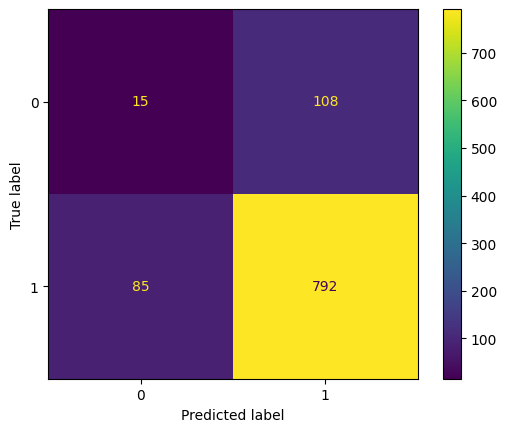

In [21]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = numpy.random.binomial(1,.9,size = 1000)
predicted = numpy.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

# **Sonuçların Açıklaması**
Oluşturulan Karmaşıklık Matrisi dört farklı bölgeden oluşmaktadır:

Gerçek Negatif (Sol Üst Çeyrek)
Yanlış Pozitif (Sağ Üst Çeyrek)
Yanlış Negatif (Sol Alt Çeyrek)
Gerçek Pozitif (Sağ Alt Çeyrek)

True değeri, değerlerin doğru tahmin edildiği anlamına gelir; False değeri ise bir hata veya yanlış tahmin olduğu anlamına gelir.

Artık bir Karmaşıklık Matrisi oluşturduğumuza göre, modelin kalitesini ölçmek için farklı ölçümler hesaplayabiliriz. İlk olarak, Doğruluk oranına bakalım.

# **Hiyerarşik Kümeleme**
Hiyerarşik kümeleme, veri noktalarını kümelemek için kullanılan denetimsiz bir öğrenme yöntemidir. Algoritma, veriler arasındaki farklılıkları ölçerek kümeler oluşturur. Denetimsiz öğrenme, bir modelin eğitilmesine gerek olmadığı ve bir "hedef" değişkene ihtiyaç duymadığımız anlamına gelir. Bu yöntem, herhangi bir veri üzerinde, bireysel veri noktaları arasındaki ilişkiyi görselleştirmek ve yorumlamak için kullanılabilir.

Burada, veri noktalarını gruplandırmak için hiyerarşik kümeleme yöntemini kullanacağız ve kümeleri hem dendrogram hem de dağılım grafiği kullanarak görselleştireceğiz.

Nasıl çalışıyor?
Aşağıdan yukarıya doğru bir yaklaşım izleyen hiyerarşik kümeleme türlerinden biri olan Aglomeratif Kümeleme yöntemini kullanacağız. Her veri noktasını kendi başına bir küme olarak ele alarak başlıyoruz. Ardından, aralarındaki mesafe en kısa olan kümeleri birleştirerek daha büyük kümeler oluşturuyoruz. Bu adım, tüm veri noktalarını içeren büyük bir küme oluşana kadar tekrarlanır.

Hiyerarşik kümeleme, hem mesafe hem de bağlantı yöntemine karar vermemizi gerektirir. Öklid mesafesini ve kümeler arasındaki varyansı en aza indirmeyi amaçlayan Ward bağlantı yöntemini kullanacağız.

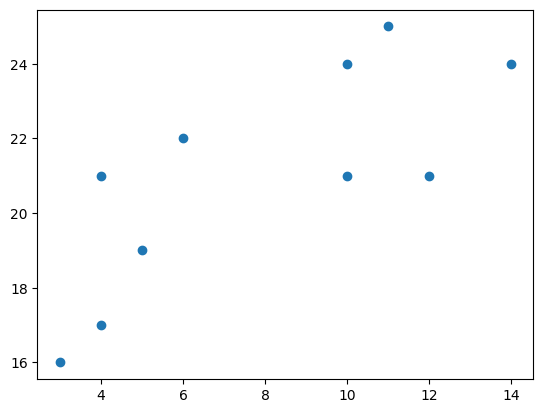

In [22]:
#Öncelikle bazı veri noktalarını görselleştirerek başlayalım:

import numpy as np
import matplotlib.pyplot as plt

x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

plt.scatter(x, y)
plt.show()

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [10.0, 10.0, 32.5, 32.5],
  [55.0, 55.0, 65.0, 65.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [60.0, 60.0, 82.5, 82.5],
  [21.25, 21.25, 71.25, 71.25]],
 'dcoord': [[0.0, np.float64(2.0), np.float64(2.0), 0.0],
  [0.0, np.float64(1.4142135623730951), np.float64(1.4142135623730951), 0.0],
  [0.0,
   np.float64(4.08248290463863),
   np.float64(4.08248290463863),
   np.float64(1.4142135623730951)],
  [np.float64(2.0),
   np.float64(5.266244708835067),
   np.float64(5.266244708835067),
   np.float64(4.08248290463863)],
  [0.0, np.float64(1.4142135623730951), np.float64(1.4142135623730951), 0.0],
  [0.0, np.float64(2.23606797749979), np.float64(2.23606797749979), 0.0],
  [0.0,
   np.float64(2.886751345948129),
   np.float64(2.886751345948129),
   np.float64(2.23606797749979)],
  [np.float64(1.4142135623730951),
   np.float64(6.860515043833565),
   np.float64(6.860515043833565),
  

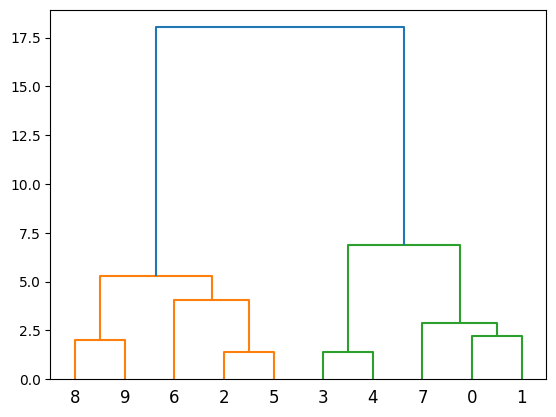

In [23]:
#Şimdi öklid mesafesini kullanarak Ward bağlantısını hesaplıyoruz ve bunu bir dendrogram kullanarak görselleştiriyoruz:

import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

data = list(zip(x, y))

linkage_data = linkage(data, method='ward', metric='euclidean')
dendrogram(linkage_data)


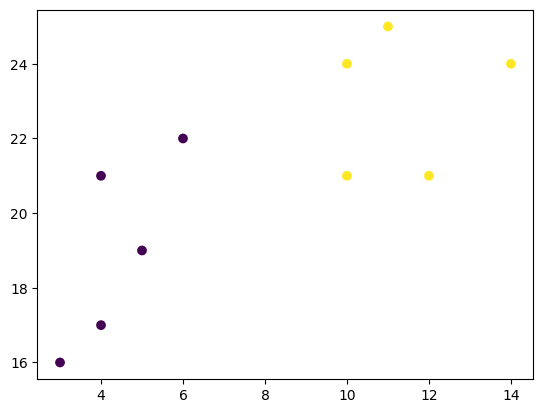

In [24]:
#Burada, aynı işlemi Python'ın scikit-learn kütüphanesiyle yapıyoruz. Ardından, 2 boyutlu bir grafikte görselleştiriyoruz:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

data = list(zip(x, y))

hierarchical_cluster = AgglomerativeClustering(n_clusters=2, linkage='ward')
labels = hierarchical_cluster.fit_predict(data)

plt.scatter(x, y, c=labels)
plt.show()

# **Örnek Açıklaması**

İhtiyaç duyduğunuz modülleri içe aktarın.

import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

Matplotlib modülü hakkında daha fazla bilgiyi "Matplotlib Eğitimi" kılavuzumuzda bulabilirsiniz .

SciPy modülü hakkında daha fazla bilgiyi SciPy Eğitim Rehberimizden edinebilirsiniz .

NumPy, Python'da diziler ve matrislerle çalışmak için kullanılan bir kütüphanedir; NumPy modülü hakkında daha fazla bilgiyi NumPy Eğitimimizde bulabilirsiniz .

scikit-learn, makine öğrenimi için popüler bir kütüphanedir.

Veri kümesindeki iki değişkene benzeyen diziler oluşturun. Burada sadece iki değişken kullandığımızı belirtmekte fayda var; ancak bu yöntem herhangi bir sayıda değişkenle de çalışacaktır:

x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

Verileri bir nokta kümesine dönüştürün:

data = list(zip(x, y))
print(data)

Sonuç:

[(4, 21), (5, 19), (10, 24), (4, 17), (3, 16), (11, 25), (14, 24), (6, 22), (10, 21), (12, 21)]

Farklı noktalar arasındaki bağlantıyı hesaplayın. Burada basit bir Öklid mesafesi ölçüsü ve kümeler arasındaki varyansı en aza indirmeyi amaçlayan Ward bağlantı algoritmasını kullanıyoruz.

linkage_data = linkage(data, method='ward', metric='euclidean')

Son olarak, sonuçları bir dendrogramda gösterin. Bu grafik, alttan (bireysel noktalar) üste (tüm veri noktalarından oluşan tek bir küme) doğru kümelerin hiyerarşisini gösterecektir.

plt.show()Bu sayede ham bağlantı verilerini değil, dendrogramı görselleştirebiliriz.

dendrogram(linkage_data)
plt.show()

Scikit-learn kütüphanesi, hiyerarşik kümelemeyi farklı bir şekilde kullanmamıza olanak tanır. İlk olarak, AgglomerativeClusteringsınıfı 2 küme ve Ward bağlantısıyla başlatıyoruz.

hierarchical_cluster = AgglomerativeClustering(n_clusters=2, linkage='ward')

Bu .fit_predictyöntem, tanımladığımız parametreleri kullanarak ve seçtiğimiz küme sayısına göre kümeleri hesaplamak için verilerimiz üzerinde uygulanabilir.

labels = hierarchical_cluster.fit_predict(data) print(labels)

Sonuç:

[0 0 1 0 0 1 1 0 1 1]

Son olarak, aynı verileri çizip, hiyerarşik kümeleme yöntemiyle her bir indekse atanan etiketleri kullanarak noktaları renklendirirsek, her bir noktanın hangi kümeye atandığını görebiliriz:

plt.scatter(x, y, c=labels)
plt.show()

# **Lojistik Regresyon**
Lojistik regresyon, sınıflandırma problemlerini çözmeyi amaçlar. Bunu, sürekli bir sonucu tahmin eden doğrusal regresyonun aksine, kategorik sonuçları tahmin ederek yapar.

En basit durumda iki sonuç vardır, buna binomiyal denir; örneğin bir tümörün kötü huylu mu yoksa iyi huylu mu olduğunu tahmin etmek buna örnektir. Diğer durumlarda sınıflandırılacak ikiden fazla sonuç vardır, bu duruma multinomiyal denir. Multinomiyal lojistik regresyon için yaygın bir örnek, bir iris çiçeğinin 3 farklı tür arasında hangi sınıfa ait olduğunu tahmin etmektir.

Burada, ikili dağılımlı bir değişkeni tahmin etmek için temel lojistik regresyon kullanacağız. Bu, değişkenin yalnızca iki olası sonucu olduğu anlamına gelir.

Nasıl çalışıyor?
Python'da, işi bizim için yapacak modüller bulunur. İlk olarak NumPy modülünü içe aktararak başlayalım.

import numpy

Bağımsız değişkenleri X'e kaydedin.

Bağımlı değişkeni y'ye kaydedin.

Aşağıda örnek bir veri seti bulunmaktadır:

#X represents the size of a tumor in centimeters.
X = numpy.array([3.78, 2.44, 2.09, 0.14, 1.72, 1.65, 4.92, 4.37, 4.96, 4.52, 3.69, 5.88]).reshape(-1,1)

#Note: X has to be reshaped into a column from a row for the LogisticRegression() function to work.
#y represents whether or not the tumor is cancerous (0 for "No", 1 for "Yes").
y = numpy.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

Sklearn modülünden bir yöntem kullanacağız, bu nedenle o modülü de içe aktarmamız gerekecek:

from sklearn import linear_model

sklearn modülünden LogisticRegression() yöntemini kullanarak bir lojistik regresyon nesnesi oluşturacağız.

fit()Bu nesnenin , bağımsız ve bağımlı değerleri parametre olarak alan ve regresyon nesnesini ilişkiyi tanımlayan verilerle dolduran bir yöntemi vardır :

logr = linear_model.LogisticRegression()
logr.fit(X,y)

Artık tümör boyutuna bağlı olarak bir tümörün kanserli olup olmadığını belirleyebilen bir lojistik regresyon nesnemiz var:

#predict if tumor is cancerous where the size is 3.46mm:
predicted = logr.predict(numpy.array([3.46]).reshape(-1,1))

In [25]:
#Örnek uygulamanın tamamını aşağıda görebilirsiniz:

import numpy
from sklearn import linear_model

#Reshaped for Logistic function.
X = numpy.array([3.78, 2.44, 2.09, 0.14, 1.72, 1.65, 4.92, 4.37, 4.96, 4.52, 3.69, 5.88]).reshape(-1,1)
y = numpy.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

logr = linear_model.LogisticRegression()
logr.fit(X,y)

#predict if tumor is cancerous where the size is 3.46mm:
predicted = logr.predict(numpy.array([3.46]).reshape(-1,1))
print(predicted)

[0]


# **Katsayı**
Lojistik regresyonda katsayı, X'teki birim değişim başına sonucun gerçekleşme olasılığının logaritmik değişimini ifade eder.

Bu, en sezgisel anlayışa sahip değil, o yüzden bunu daha mantıklı bir şey yaratmak için kullanalım: olasılıklar.

In [26]:
#Örnek uygulamanın tamamını aşağıda görebilirsiniz:

import numpy
from sklearn import linear_model

#Reshaped for Logistic function.
X = numpy.array([3.78, 2.44, 2.09, 0.14, 1.72, 1.65, 4.92, 4.37, 4.96, 4.52, 3.69, 5.88]).reshape(-1,1)
y = numpy.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

logr = linear_model.LogisticRegression()
logr.fit(X,y)

log_odds = logr.coef_
odds = numpy.exp(log_odds)

print(odds)

[[4.03557295]]


# **Olasılık**
Katsayı ve kesişim değerleri, her tümörün kanserli olma olasılığını bulmak için kullanılabilir.

Modelin katsayı ve kesişim değerlerini kullanarak yeni bir değer döndüren bir fonksiyon oluşturun. Bu yeni değer, verilen gözlemin tümör olma olasılığını temsil eder:

def logit2prob(logr,x):
  log_odds = logr.coef_ * x + logr.intercept_
  odds = numpy.exp(log_odds)
  probability = odds / (1 + odds)
  return(probability)

İşlev Açıklaması
Her bir gözlem için log-olasılık oranını bulmak için öncelikle katsayıyı ve kesişim noktasını çıkararak doğrusal regresyondakine benzer bir formül oluşturmalıyız.

log_odds = logr.coef_ * x + logr.intercept_

Logaritma oranlarını oranlara dönüştürmek için logaritma oranlarını üssel hale getirmemiz gerekir.

odds = numpy.exp(log_odds)

Şimdi oranları bildiğimize göre, bunu oran artı 1'e bölerek olasılığa dönüştürebiliriz.

probability = odds / (1 + odds)

Şimdi öğrendiklerimizi kullanarak bu fonksiyonu her tümörün kanserli olma olasılığını bulalım.

In [27]:
#Örnek uygulamanın tamamını aşağıda görebilirsiniz:

import numpy
from sklearn import linear_model

X = numpy.array([3.78, 2.44, 2.09, 0.14, 1.72, 1.65, 4.92, 4.37, 4.96, 4.52, 3.69, 5.88]).reshape(-1,1)
y = numpy.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

logr = linear_model.LogisticRegression()
logr.fit(X,y)

def logit2prob(logr, X):
  log_odds = logr.coef_ * X + logr.intercept_
  odds = numpy.exp(log_odds)
  probability = odds / (1 + odds)
  return(probability)

print(logit2prob(logr, X))

[[0.60749168]
 [0.19267555]
 [0.12774788]
 [0.00955056]
 [0.08037781]
 [0.0734485 ]
 [0.88362857]
 [0.77901203]
 [0.88924534]
 [0.81293431]
 [0.57718238]
 [0.96664398]]


# **Sonuçların Açıklaması**
3,78 0,61 3,78 cm büyüklüğündeki bir tümörün kanserli olma olasılığı %61'dir.

2,44 0,19 2,44 cm büyüklüğündeki bir tümörün kanserli olma olasılığı %19'dur.

2.09 0.13 2.09 cm boyutundaki bir tümörün kanserli olma olasılığı %13'tür.

# **Izgara Arama**
Makine öğrenimi modellerinin büyük çoğunluğu, modelin nasıl öğrendiğini değiştirmek için ayarlanabilen parametreler içerir. Örneğin, [kaynak]'tan alınan lojistik regresyon modelinde, modelin karmaşıklığını etkileyen düzenlemeyi kontrol eden sklearnbir parametre bulunur .C

için en iyi değeri nasıl seçeriz C? En iyi değer, modeli eğitmek için kullanılan verilere bağlıdır.

Nasıl çalışıyor?
Bir yöntem, farklı değerleri denemek ve ardından en iyi sonucu veren değeri seçmektir. Bu teknik, ızgara arama olarak bilinir . İki veya daha fazla parametre için değerler seçmemiz gerekirse, değer kümelerinin tüm kombinasyonlarını değerlendirerek bir değer ızgarası oluştururuz.

Örneğe geçmeden önce, değiştirdiğimiz parametrenin ne işe yaradığını bilmekte fayda var. Daha yüksek değerler C, modele eğitim verilerinin gerçek dünya bilgilerine benzediğini ve eğitim verilerine daha fazla ağırlık verdiğini söyler. Daha düşük değerler ise bunun Ctam tersini yapar.

Varsayılan Parametreleri Kullanma
Öncelikle, yalnızca temel parametreleri kullanarak ızgara araması yapmadan ne tür sonuçlar üretebileceğimize bakalım.

Başlamak için öncelikle üzerinde çalışacağımız veri setini yüklememiz gerekiyor.

from sklearn import datasets
iris = datasets.load_iris()

Modeli oluşturmak için öncelikle bir dizi bağımsız değişken X ve bir bağımlı değişken y'ye ihtiyacımız var.

X = iris['data']
y = iris['target']

Şimdi, iris çiçeklerini sınıflandırmak için lojistik modeli yükleyeceğiz.

from sklearn.linear_model import LogisticRegression

Model oluşturulurken, modelin sonuç bulmasını sağlamak için max_iter değeri daha yüksek bir değere ayarlandı.

CLojistik regresyon modelinde varsayılan değerinin olduğunu unutmayın 1, bunu daha sonra karşılaştıracağız.

Aşağıdaki örnekte, iris veri setine bakıyoruz ve Clojistik regresyonda değişen değerler için bir model eğitmeye çalışıyoruz.

logit = LogisticRegression(max_iter = 10000)

Modeli oluşturduktan sonra, modeli verilere uyarlamamız gerekir.

print(logit.fit(X,y))

Modeli değerlendirmek için puanlama yöntemini kullanıyoruz.

print(logit.score(X,y))

In [28]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

iris = datasets.load_iris()

X = iris['data']
y = iris['target']

logit = LogisticRegression(max_iter = 10000)

print(logit.fit(X,y))

print(logit.score(X,y))

LogisticRegression(max_iter=10000)
0.9733333333333334


Varsayılan ayar ile C = 1, puan elde ettik 0.973.

Fark değerleri 0,973 olan bir ızgara araması uygulayarak daha iyi bir sonuç elde edip edemeyeceğimize bakalım.

# **Izgara Arama Yönteminin Uygulanması**
Önceki adımları aynen tekrarlayacağız, ancak bu sefer için bir değer aralığı belirleyeceğiz C.

Aranan parametreler için hangi değerlerin ayarlanacağını bilmek, alan bilgisi ve pratik gerektirir.

Varsayılan değer olduğundan C, 1bu değerin etrafında bir değer aralığı belirleyeceğiz.

C = [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2]

CŞimdi, değerleri değiştirmek ve her değişiklikte modeli değerlendirmek için bir for döngüsü oluşturacağız .

Öncelikle, puanı saklamak için boş bir liste oluşturacağız.

scores = []

Değerleri değiştirmek için, Cdeğer aralığı üzerinde döngü oluşturmalı ve parametreyi her seferinde güncellemeliyiz.

for choice in C:
  logit.set_params(C=choice)
  logit.fit(X, y)
  scores.append(logit.score(X, y))

Puanlar bir listede saklandığı için, en iyi seçeneğin hangisi olduğunu değerlendirebiliriz C.

print(scores)

In [29]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

iris = datasets.load_iris()

X = iris['data']
y = iris['target']

logit = LogisticRegression(max_iter = 10000)

C = [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2]

scores = []

for choice in C:
  logit.set_params(C=choice)
  logit.fit(X, y)
  scores.append(logit.score(X, y))

print(scores)

[0.9666666666666667, 0.9666666666666667, 0.9733333333333334, 0.9733333333333334, 0.98, 0.98, 0.9866666666666667, 0.9866666666666667]


# **Sonuçların Açıklaması**
CDaha düşük değerlerinin, temel parametreye göre daha kötü performans gösterdiğini görebiliriz 1. Ancak, değerini artırdıkça Cmodelin 1.75doğruluğu da arttı.

CBu miktarın ötesine geçmenin model doğruluğunu artırmaya yardımcı olmadığı görülüyor .

En İyi Uygulamalar Hakkında Not
Lojistik regresyon modelimizi, onu eğitmek için kullanılan aynı verileri kullanarak puanlandırdık. Model bu verilere çok fazla benziyorsa, görünmeyen verileri tahmin etmede başarılı olmayabilir. Bu istatistiksel hata aşırı uyum (overfitting) olarak bilinir .

Eğitim verilerindeki puanların yanıltıcı olmasından kaçınmak için, verilerimizin bir kısmını ayırıp özellikle modeli test etmek amacıyla kullanabiliriz. Yanıltıcı olmaktan ve aşırı uyumdan kaçınmak için eğitim/test veri setinin bölünmesiyle ilgili derse bakın.

# **Kategorik Veriler**
Verilerinizde metin dizeleriyle temsil edilen kategoriler varsa, genellikle yalnızca sayısal verileri kabul eden makine öğrenimi modellerini eğitmek zor olacaktır.

Kategorik verileri göz ardı edip modelimizden dışlamak yerine, verileri kendi modellerinizde kullanılabilecek şekilde dönüştürebilirsiniz.

Aşağıdaki tabloya bir göz atın, bu, çoklu regresyon bölümünde kullandığımız veri setinin aynısıdır .

In [30]:
import pandas as pd

cars = pd.read_csv('data.csv')
print(cars.to_string())

           Car       Model  Volume  Weight  CO2
0       Toyoty        Aygo    1000     790   99
1   Mitsubishi  Space Star    1200    1160   95
2        Skoda      Citigo    1000     929   95
3         Fiat         500     900     865   90
4         Mini      Cooper    1500    1140  105
5           VW         Up!    1000     929  105
6        Skoda       Fabia    1400    1109   90
7     Mercedes     A-Class    1500    1365   92
8         Ford      Fiesta    1500    1112   98
9         Audi          A1    1600    1150   99
10     Hyundai         I20    1100     980   99
11      Suzuki       Swift    1300     990  101
12        Ford      Fiesta    1000    1112   99
13       Honda       Civic    1600    1252   94
14      Hundai         I30    1600    1326   97
15        Opel       Astra    1600    1330   97
16         BMW           1    1600    1365   99
17       Mazda           3    2200    1280  104
18       Skoda       Rapid    1600    1119  104
19        Ford       Focus    2000    13

Çoklu regresyon bölümünde, motor hacmi ve aracın ağırlığına dayanarak CO2 emisyonunu tahmin etmeye çalıştık, ancak araç markası ve modeli hakkındaki bilgileri hariç tuttuk.

Araç markası veya modeli hakkındaki bilgiler, salınan CO2 miktarını daha iyi tahmin etmemize yardımcı olabilir.

# **Tekil Kodlama**
Verilerimizde yer alan "Araç" veya "Model" sütunları sayısal olmadığı için bunları kullanamıyoruz. Kategorik bir değişken olan "Araç" veya "Model" ile sayısal bir değişken olan "CO2" arasında doğrusal bir ilişki belirlenemez.

Bu sorunu çözmek için, kategorik değişkenin sayısal bir temsiline ihtiyacımız var. Bunu yapmanın bir yolu, kategorideki her grubu temsil eden bir sütun oluşturmaktır.

Her sütun için değerler 1 veya 0 olacaktır; 1 grubun dahil edilmesini, 0 ise hariç tutulmasını temsil eder. Bu dönüşüme tekil kodlama (one-hot encoding) denir.

Bunu manuel olarak yapmanıza gerek yok, Python Pandas modülünde tekil get_dummies()kodlama (one-hot encoding) yapan bir fonksiyon bulunmaktadır.

Pandas modülü hakkında daha fazla bilgi edinmek için Pandas Eğitimimize göz atın .

In [31]:
#One Hot Encode the Car sütunu:

import pandas as pd

cars = pd.read_csv('data.csv')
ohe_cars = pd.get_dummies(cars[['Car']])

print(ohe_cars.to_string())

    Car_Audi  Car_BMW  Car_Fiat  Car_Ford  Car_Honda  Car_Hundai  Car_Hyundai  Car_Mazda  Car_Mercedes  Car_Mini  Car_Mitsubishi  Car_Opel  Car_Skoda  Car_Suzuki  Car_Toyoty  Car_VW  Car_Volvo
0      False    False     False     False      False       False        False      False         False     False           False     False      False       False        True   False      False
1      False    False     False     False      False       False        False      False         False     False            True     False      False       False       False   False      False
2      False    False     False     False      False       False        False      False         False     False           False     False       True       False       False   False      False
3      False    False      True     False      False       False        False      False         False     False           False     False      False       False       False   False      False
4      False    False     False    

Sonuçlar
Otomobil sütununda her otomobil markası için ayrı bir sütun oluşturuldu.

# **CO2'yi tahmin et**
Hacim ve ağırlıkla birlikte bu ek bilgiyi kullanarak CO2'yi tahmin edebiliriz.

concat()Bilgileri birleştirmek için pandas'tan gelen fonksiyonu kullanabiliriz .

Öncelikle birkaç modülü içe aktarmamız gerekecek.

Öncelikle Pandas paketini içe aktararak başlayacağız.

import pandas

Pandas modülü, CSV dosyalarını okumamıza ve DataFrame nesnelerini işlememize olanak tanır:

cars = pandas.read_csv("data.csv")

Bu aynı zamanda bize kukla değişkenler oluşturma olanağı da sağlıyor:

ohe_cars = pandas.get_dummies(cars[['Car']])

Ardından bağımsız değişkenleri (X) seçmeli ve kukla değişkenleri sütun bazında eklemeliyiz.

Bağımlı değişkeni de y'ye kaydedin.

X = pandas.concat([cars[['Volume', 'Weight']], ohe_cars], axis=1)
y = cars['CO2']

Doğrusal bir model oluşturmak için sklearn'den bir metot da içe aktarmamız gerekiyor.

Doğrusal regresyon hakkında bilgi edinin .

from sklearn import linear_model

Şimdi verileri doğrusal regresyona uydurabiliriz:

regr = linear_model.LinearRegression()
regr.fit(X,y)

Son olarak, aracın ağırlığına, hacmine ve üreticisine dayanarak CO2 emisyonlarını tahmin edebiliriz.

##predict the CO2 emission of a VW where the weight is 2300kg, and the volume is 1300cm3:
predictedCO2 = regr.predict([[2300, 1300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0]])

In [32]:
import pandas
from sklearn import linear_model

cars = pandas.read_csv("data.csv")
ohe_cars = pandas.get_dummies(cars[['Car']])

X = pandas.concat([cars[['Volume', 'Weight']], ohe_cars], axis=1)
y = cars['CO2']

regr = linear_model.LinearRegression()
regr.fit(X,y)

##predict the CO2 emission of a VW where the weight is 2300kg, and the volume is 1300cm3:
predictedCO2 = regr.predict([[2300, 1300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0]])

print(predictedCO2)

[122.45153299]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Artık veri setindeki her bir otomobil markası, hacmi ve ağırlığı için bir katsayıya sahibiz.

# **Aptallaştırmak**
Kategorinizdeki her grup için ayrı bir sütun oluşturmanız gerekmez. Bilgiler, sahip olduğunuz grup sayısından 1 eksik sütun kullanılarak da saklanabilir.

Örneğin, renkleri temsil eden bir sütununuz var ve bu sütunda kırmızı ve mavi olmak üzere iki renk bulunuyor.

In [33]:
import pandas as pd

colors = pd.DataFrame({'color': ['blue', 'red']})

print(colors)

  color
0  blue
1   red


Kırmızı adında bir sütun oluşturabilirsiniz; burada 1 kırmızıyı, 0 ise kırmızı olmayan yani maviyi temsil eder.

Bunu yapmak için, tekil kodlama için kullandığımız aynı fonksiyonu, yani `get_dummies` fonksiyonunu kullanabilir ve ardından sütunlardan birini silebiliriz. `drop_first` argümanı, sonuç tablosundan ilk sütunu hariç tutmamızı sağlar.

In [34]:
import pandas as pd

colors = pd.DataFrame({'color': ['blue', 'red']})
dummies = pd.get_dummies(colors, drop_first=True)

print(dummies)

   color_red
0      False
1       True


Peki ya 2'den fazla grubunuz varsa? Birden fazla grup nasıl 1 sütun eksik şekilde temsil edilebilir?

Diyelim ki bu sefer kırmızı, mavi ve yeşil olmak üzere üç rengimiz var. İlk sütunu silerken get_dummies fonksiyonunu kullandığımızda aşağıdaki tabloyu elde ederiz.

In [35]:
import pandas as pd

colors = pd.DataFrame({'color': ['blue', 'red', 'green']})
dummies = pd.get_dummies(colors, drop_first=True)
dummies['color'] = colors['color']

print(dummies)

   color_green  color_red  color
0        False      False   blue
1        False       True    red
2         True      False  green


# **K-ortalamalar**
K-means, veri noktalarını kümelemek için kullanılan denetimsiz bir öğrenme yöntemidir. Algoritma, her kümedeki varyansı en aza indirerek veri noktalarını yinelemeli olarak K kümeye ayırır.

Burada, dirsek yöntemi kullanarak K için en iyi değeri nasıl tahmin edeceğinizi ve ardından K-ortalamalar kümeleme algoritmasını kullanarak veri noktalarını kümelere nasıl ayıracağınızı göstereceğiz.

Nasıl çalışıyor?
Öncelikle, her veri noktası rastgele olarak K kümeden birine atanır. Ardından, her kümenin merkez noktasını (işlevsel olarak merkezini) hesaplarız ve her veri noktasını en yakın merkez noktasına sahip kümeye yeniden atarız. Bu işlemi, her veri noktası için küme atamaları artık değişmeyene kadar tekrarlarız.

K-ortalama kümeleme, verileri gruplandırmak istediğimiz küme sayısı olan K'yı seçmemizi gerektirir. Dirsek yöntemi, ataleti (mesafeye dayalı bir ölçüt) grafiklendirmemize ve doğrusal olarak azalmaya başladığı noktayı görselleştirmemize olanak tanır. Bu noktaya "dirsek" denir ve verilerimize dayanarak K için en iyi değerin iyi bir tahmini olarak kabul edilir.

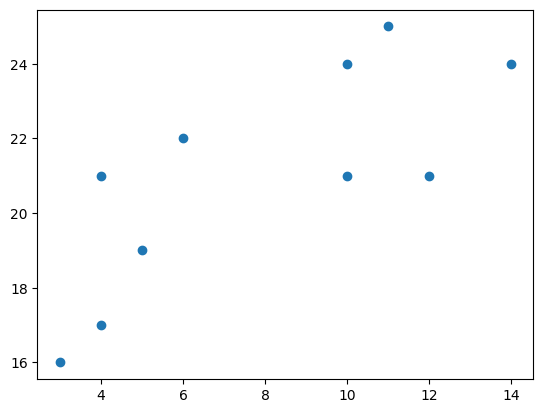

In [37]:
#Öncelikle bazı veri noktalarını görselleştirerek başlayalım:

import matplotlib.pyplot as plt

x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

plt.scatter(x, y)
plt.show()

Şimdi dirsek yöntemini kullanarak K'nin farklı değerleri için atalet momentini görselleştireceğiz:

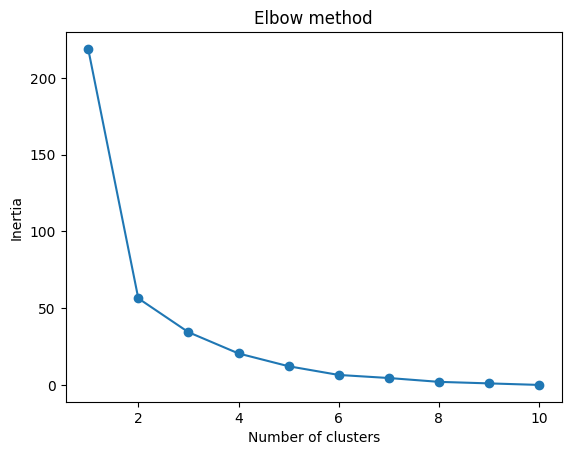

In [38]:
from sklearn.cluster import KMeans

data = list(zip(x, y))
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

Dirsek yöntemi, K için 2'nin iyi bir değer olduğunu gösteriyor, bu nedenle yeniden eğitiyoruz ve sonucu görselleştiriyoruz:

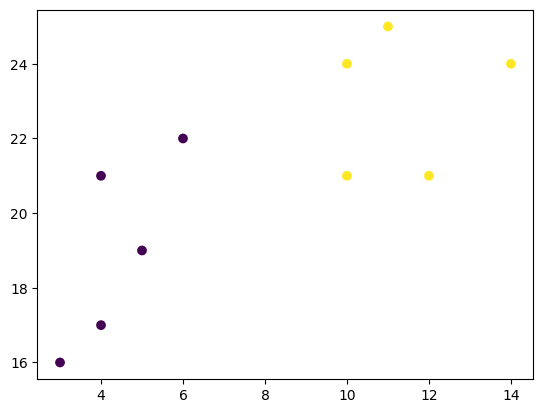

In [39]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)

plt.scatter(x, y, c=kmeans.labels_)
plt.show()

# **Örnek Açıklaması**
İhtiyaç duyduğunuz modülleri içe aktarın.

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Matplotlib modülü hakkında daha fazla bilgiyi "Matplotlib Eğitimi" kılavuzumuzda bulabilirsiniz .

scikit-learn, makine öğrenimi için popüler bir kütüphanedir.

Veri kümesindeki iki değişkene benzeyen diziler oluşturun. Burada sadece iki değişken kullandığımızı belirtmekte fayda var; ancak bu yöntem herhangi bir sayıda değişkenle de çalışacaktır:

x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

Verileri bir nokta kümesine dönüştürün:

data = list(zip(x, y))
print(data)

Sonuç:

[(4, 21), (5, 19), (10, 24), (4, 17), (3, 16), (11, 25), (14, 24), (6, 22), (10, 21), (12, 21)]

K için en iyi değeri bulmak için, verilerimiz üzerinde olası değerler aralığı için K-means algoritmasını çalıştırmamız gerekiyor. Sadece 10 veri noktamız var, bu nedenle maksimum küme sayısı 10'dur. Bu yüzden, (1,11) aralığındaki her K değeri için bir K-means modeli eğitiyoruz ve o küme sayısındaki ataleti çiziyoruz:

inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

Yukarıdaki grafikteki "dirsek" noktasının (atalet eğrisinin daha doğrusal hale geldiği nokta) K=2'de olduğunu görebiliriz. Ardından K-ortalamalar algoritmasını bir kez daha uygulayabilir ve verilere atanan farklı kümeleri çizebiliriz:

kmeans = KMeans(n_clusters=2)
kmeans.fit(data)

plt.scatter(x, y, c=kmeans.labels_)
plt.show()

# **Torbalama**
Karar ağaçları gibi yöntemler, eğitim veri setinde aşırı uyum göstermeye yatkın olabilir ve bu da yeni veriler üzerinde yanlış tahminlere yol açabilir.

Bootstrap Aggregation (bagging), sınıflandırma veya regresyon problemlerinde aşırı uyum sorununu çözmeyi amaçlayan bir topluluk oluşturma yöntemidir. Bagging, makine öğrenimi algoritmalarının doğruluğunu ve performansını iyileştirmeyi hedefler. Bunu, orijinal veri kümesinin rastgele alt kümelerini, yerine koyarak alarak ve her alt kümeye bir sınıflandırıcı (sınıflandırma için) veya regresyon algoritması (regresyon için) uygulayarak yapar. Her alt küme için tahminler daha sonra sınıflandırma için çoğunluk oylaması veya regresyon için ortalama alma yoluyla bir araya getirilerek tahmin doğruluğu artırılır.

Temel Sınıflandırıcıyı Değerlendirme
Bagging yönteminin model performansını nasıl iyileştirebileceğini görmek için, öncelikle temel sınıflandırıcının veri kümesi üzerindeki performansını değerlendirmeliyiz. Karar ağaçlarının ne olduğunu bilmiyorsanız, ilerlemeden önce karar ağaçları hakkındaki dersi gözden geçirin, çünkü bagging bu kavramın bir devamıdır.

Sklearn'ün şarap veri setinde bulunan farklı şarap sınıflarını belirlemeyi hedefliyoruz.

Öncelikle gerekli modülleri içe aktararak başlayalım.
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

Ardından verileri yüklememiz ve X (giriş özellikleri) ve Y (hedef) sütunlarına kaydetmemiz gerekiyor. as_frame parametresi True olarak ayarlanmıştır, böylece verileri yüklerken özellik adlarını kaybetmeyiz. ( sklearn0.23'ten eski sürümler bu argümanı atlamalıdır, as_frameçünkü desteklenmemektedir.)

data = datasets.load_wine(as_frame = True)

X = data.data
y = data.target

Modelimizi daha önce görülmemiş veriler üzerinde doğru şekilde değerlendirebilmek için X ve Y'yi eğitim ve test kümelerine ayırmamız gerekiyor. Verilerin ayrılması hakkında bilgi için Eğitim/Test dersine bakın.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 22)

Verilerimizi hazırladıktan sonra, artık temel bir sınıflandırıcı oluşturabilir ve bunu eğitim verilerine uygulayabiliriz.

dtree = DecisionTreeClassifier(random_state = 22)
dtree.fit(X_train,y_train)

Sonuç:

DecisionTreeClassifier(random_state=22)

Artık daha önce görülmemiş test setindeki şarapların sınıfını tahmin edebilir ve modelin performansını değerlendirebiliriz.

y_pred = dtree.predict(X_test)

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = dtree.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = y_pred))

Sonuç:

Train data accuracy: 1.0
Test data accuracy: 0.8222222222222222

In [40]:
#Gerekli verileri içe aktarın ve temel sınıflandırıcı performansını değerlendirin.

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

data = datasets.load_wine(as_frame = True)

X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 22)

dtree = DecisionTreeClassifier(random_state = 22)
dtree.fit(X_train,y_train)

y_pred = dtree.predict(X_test)

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = dtree.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = y_pred))

Train data accuracy: 1.0
Test data accuracy: 0.8222222222222222


Temel sınıflandırıcı, mevcut parametrelerle test veri kümesinde %82 doğruluk oranına ulaşarak veri kümesi üzerinde oldukça iyi performans göstermektedir (Parametreleri ayarlamazsanız farklı sonuçlar ortaya çıkabilir random_state).

Test veri seti için temel doğruluk oranına sahip olduğumuza göre, Bagging Sınıflandırıcısının tek bir Karar Ağacı Sınıflandırıcısından nasıl daha iyi performans gösterdiğini görebiliriz.

Bir Torbalama Sınıflandırıcısı Oluşturma
Bagging işlemi için n_estimators parametresini ayarlamamız gerekiyor; bu, modelimizin bir araya getireceği temel sınıflandırıcıların sayısıdır.

Bu örnek veri seti için tahmin edici sayısı nispeten düşüktür; genellikle çok daha geniş aralıklar incelenir. Hiperparametre ayarlaması genellikle ızgara arama yöntemiyle yapılır , ancak şimdilik tahmin edici sayısı için seçilmiş bir değer kümesi kullanacağız.

Öncelikle gerekli modeli içe aktararak başlıyoruz.

from sklearn.ensemble import BaggingClassifier

Şimdi, her bir toplulukta kullanmak istediğimiz tahminleyici sayısını temsil eden bir değer aralığı oluşturalım.

estimator_range = [2,4,6,8,10,12,14,16]

Bagging Sınıflandırıcısının n_estimators'ın farklı değerleriyle nasıl performans gösterdiğini görmek için, değer aralığı üzerinde yineleme yapıp her bir topluluktan elde edilen sonuçları saklamanın bir yoluna ihtiyacımız var. Bunu yapmak için, modelleri ve puanları daha sonraki görselleştirmeler için ayrı listelerde saklayan bir for döngüsü oluşturacağız.

Not: Temel sınıflandırıcı için varsayılan parametre BaggingClassifierboştur, DecisionTreeClassifierbu nedenle torbalama modelini oluştururken bunu ayarlamamıza gerek yoktur.

models = []
scores = []

for n_estimators in estimator_range:

    # Create bagging classifier
    clf = BaggingClassifier(n_estimators = n_estimators, random_state = 22)

    # Fit the model
    clf.fit(X_train, y_train)

    # Append the model and score to their respective list
    models.append(clf)
    scores.append(accuracy_score(y_true = y_test, y_pred = clf.predict(X_test)))

Modeller ve puanlar kaydedildikten sonra, model performansındaki iyileşmeyi artık görselleştirebiliriz.

import matplotlib.pyplot as plt

# Generate the plot of scores against number of estimators
plt.figure(figsize=(9,6))
plt.plot(estimator_range, scores)

# Adjust labels and font (to make visable)
plt.xlabel("n_estimators", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)

# Visualize plot
plt.show()

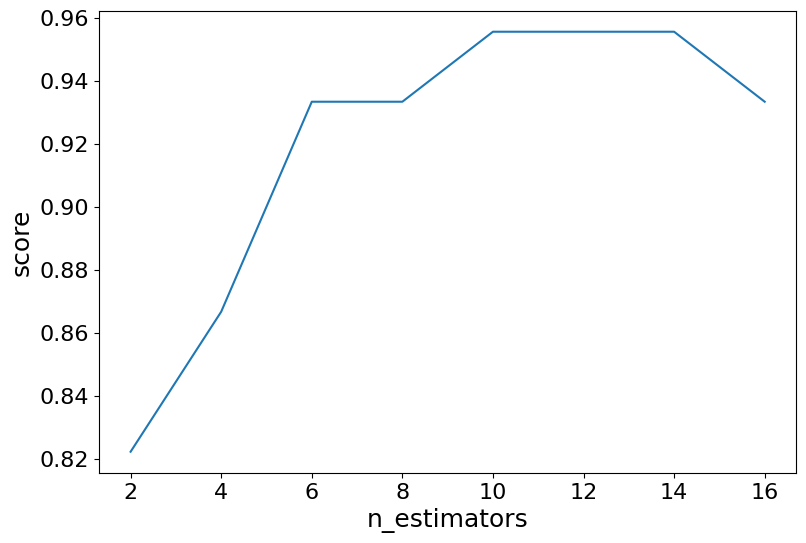

In [41]:
#Gerekli verileri içe aktarın ve BaggingClassifierperformansı değerlendirin.

import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier

data = datasets.load_wine(as_frame = True)

X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 22)

estimator_range = [2,4,6,8,10,12,14,16]

models = []
scores = []

for n_estimators in estimator_range:

    # Create bagging classifier
    clf = BaggingClassifier(n_estimators = n_estimators, random_state = 22)

    # Fit the model
    clf.fit(X_train, y_train)

    # Append the model and score to their respective list
    models.append(clf)
    scores.append(accuracy_score(y_true = y_test, y_pred = clf.predict(X_test)))

# Generate the plot of scores against number of estimators
plt.figure(figsize=(9,6))
plt.plot(estimator_range, scores)

# Adjust labels and font (to make visable)
plt.xlabel("n_estimators", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)

# Visualize plot
plt.show()

# **Sonuçların Açıklaması**
Tahminci sayısı için farklı değerler üzerinde yineleme yaparak model performansının %82,2'den %95,5'e yükseldiğini görebiliriz. 14 tahminciden sonra doğruluk düşmeye başlar; farklı bir değer ayarlarsanız gördüğünüz değerler değişecektir. Bu nedenle , istikrarlı sonuçlar elde etmek için çapraz doğrulamarandom_state kullanmak en iyi uygulamadır .

Bu durumda, şarap türünü belirleme konusunda doğruluk oranında %13,3'lük bir artış görüyoruz.

Başka Bir Değerlendirme Biçimi
Önyükleme (bootstrapping) yöntemi, sınıflandırıcılar oluşturmak için rastgele gözlem alt kümeleri seçtiğinden, seçim sürecinde dışarıda kalan gözlemler vardır. Bu "torba dışı" gözlemler daha sonra, bir test kümesine benzer şekilde, modeli değerlendirmek için kullanılabilir. Unutmayın ki, torba dışı tahmin, ikili sınıflandırma problemlerinde hatayı abartabilir ve yalnızca diğer ölçütlere ek olarak kullanılmalıdır.

Son alıştırmada 12 tahmincinin en yüksek doğruluğu sağladığını gördük, bu nedenle modelimizi oluşturmak için bunu kullanacağız. Bu sefer, oob_scoremodeli torba dışı skorla değerlendirmek için parametreyi true olarak ayarlayacağız.

In [43]:
#Torba dışı ölçümleme özelliğine sahip bir model oluşturun.

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier

data = datasets.load_wine(as_frame = True)

X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 22)

oob_model = BaggingClassifier(n_estimators = 12, oob_score = True,random_state = 22)

oob_model.fit(X_train, y_train)

print(oob_model.oob_score_)

0.9398496240601504


OOB'de ve test setinde kullanılan örnekler farklı olduğundan ve veri seti nispeten küçük olduğundan, doğrulukta bir farklılık vardır. Tam olarak aynı olmaları nadirdir; tekrar belirtmek gerekirse, OOB hata tahmini için hızlı bir yöntem olarak kullanılmalıdır, ancak tek değerlendirme ölçütü değildir.

# **Bagging Sınıflandırıcısından Karar Ağaçları Oluşturma**
Karar Ağacı dersinde görüldüğü gibi , modelin oluşturduğu karar ağacının grafiğini çizmek mümkündür. Ayrıca, birleştirilmiş sınıflandırıcıya giren bireysel karar ağaçlarını da görmek mümkündür. Bu, torbalama modelinin tahminlerine nasıl ulaştığına dair daha sezgisel bir anlayış kazanmamıza yardımcı olur.

Not: Bu özellik yalnızca ağaçların nispeten sığ ve dar olduğu, dolayısıyla görselleştirmenin kolay olduğu daha küçük veri kümelerinde çalışır.

plot_treeFonksiyonu içe aktarmamız gerekecek sklearn.tree. Görselleştirmek istediğiniz tahminleyiciyi değiştirerek farklı ağaçları grafik haline getirebilirsiniz.
Karar Ağacı dersinde görüldüğü gibi , modelin oluşturduğu karar ağacının grafiğini çizmek mümkündür. Ayrıca, birleştirilmiş sınıflandırıcıya giren bireysel karar ağaçlarını da görmek mümkündür. Bu, torbalama modelinin tahminlerine nasıl ulaştığına dair daha sezgisel bir anlayış kazanmamıza yardımcı olur.

Not: Bu özellik yalnızca ağaçların nispeten sığ ve dar olduğu, dolayısıyla görselleştirmenin kolay olduğu daha küçük veri kümelerinde çalışır.

plot_treeFonksiyonu içe aktarmamız gerekecek sklearn.tree. Görselleştirmek istediğiniz tahminleyiciyi değiştirerek farklı ağaçları grafik haline getirebilirsiniz.

[Text(0.4583333333333333, 0.875, 'proline <= 727.5\ngini = 0.611\nsamples = 82\nvalue = [54, 60, 19]'),
 Text(0.25, 0.625, 'flavanoids <= 1.335\ngini = 0.339\nsamples = 47\nvalue = [0, 58, 16]'),
 Text(0.35416666666666663, 0.75, 'True  '),
 Text(0.16666666666666666, 0.375, 'hue <= 0.92\ngini = 0.266\nsamples = 15\nvalue = [0, 3, 16]'),
 Text(0.08333333333333333, 0.125, 'gini = 0.0\nsamples = 13\nvalue = [0, 0, 16]'),
 Text(0.25, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 3, 0]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 32\nvalue = [0, 55, 0]'),
 Text(0.6666666666666666, 0.625, 'flavanoids <= 1.605\ngini = 0.159\nsamples = 35\nvalue = [54, 2, 3]'),
 Text(0.5625, 0.75, '  False'),
 Text(0.5, 0.375, 'color_intensity <= 4.325\ngini = 0.375\nsamples = 3\nvalue = [0, 1, 3]'),
 Text(0.4166666666666667, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.5833333333333334, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 3]'),
 Text(0.8333333333333334, 0.375, 'magnesi

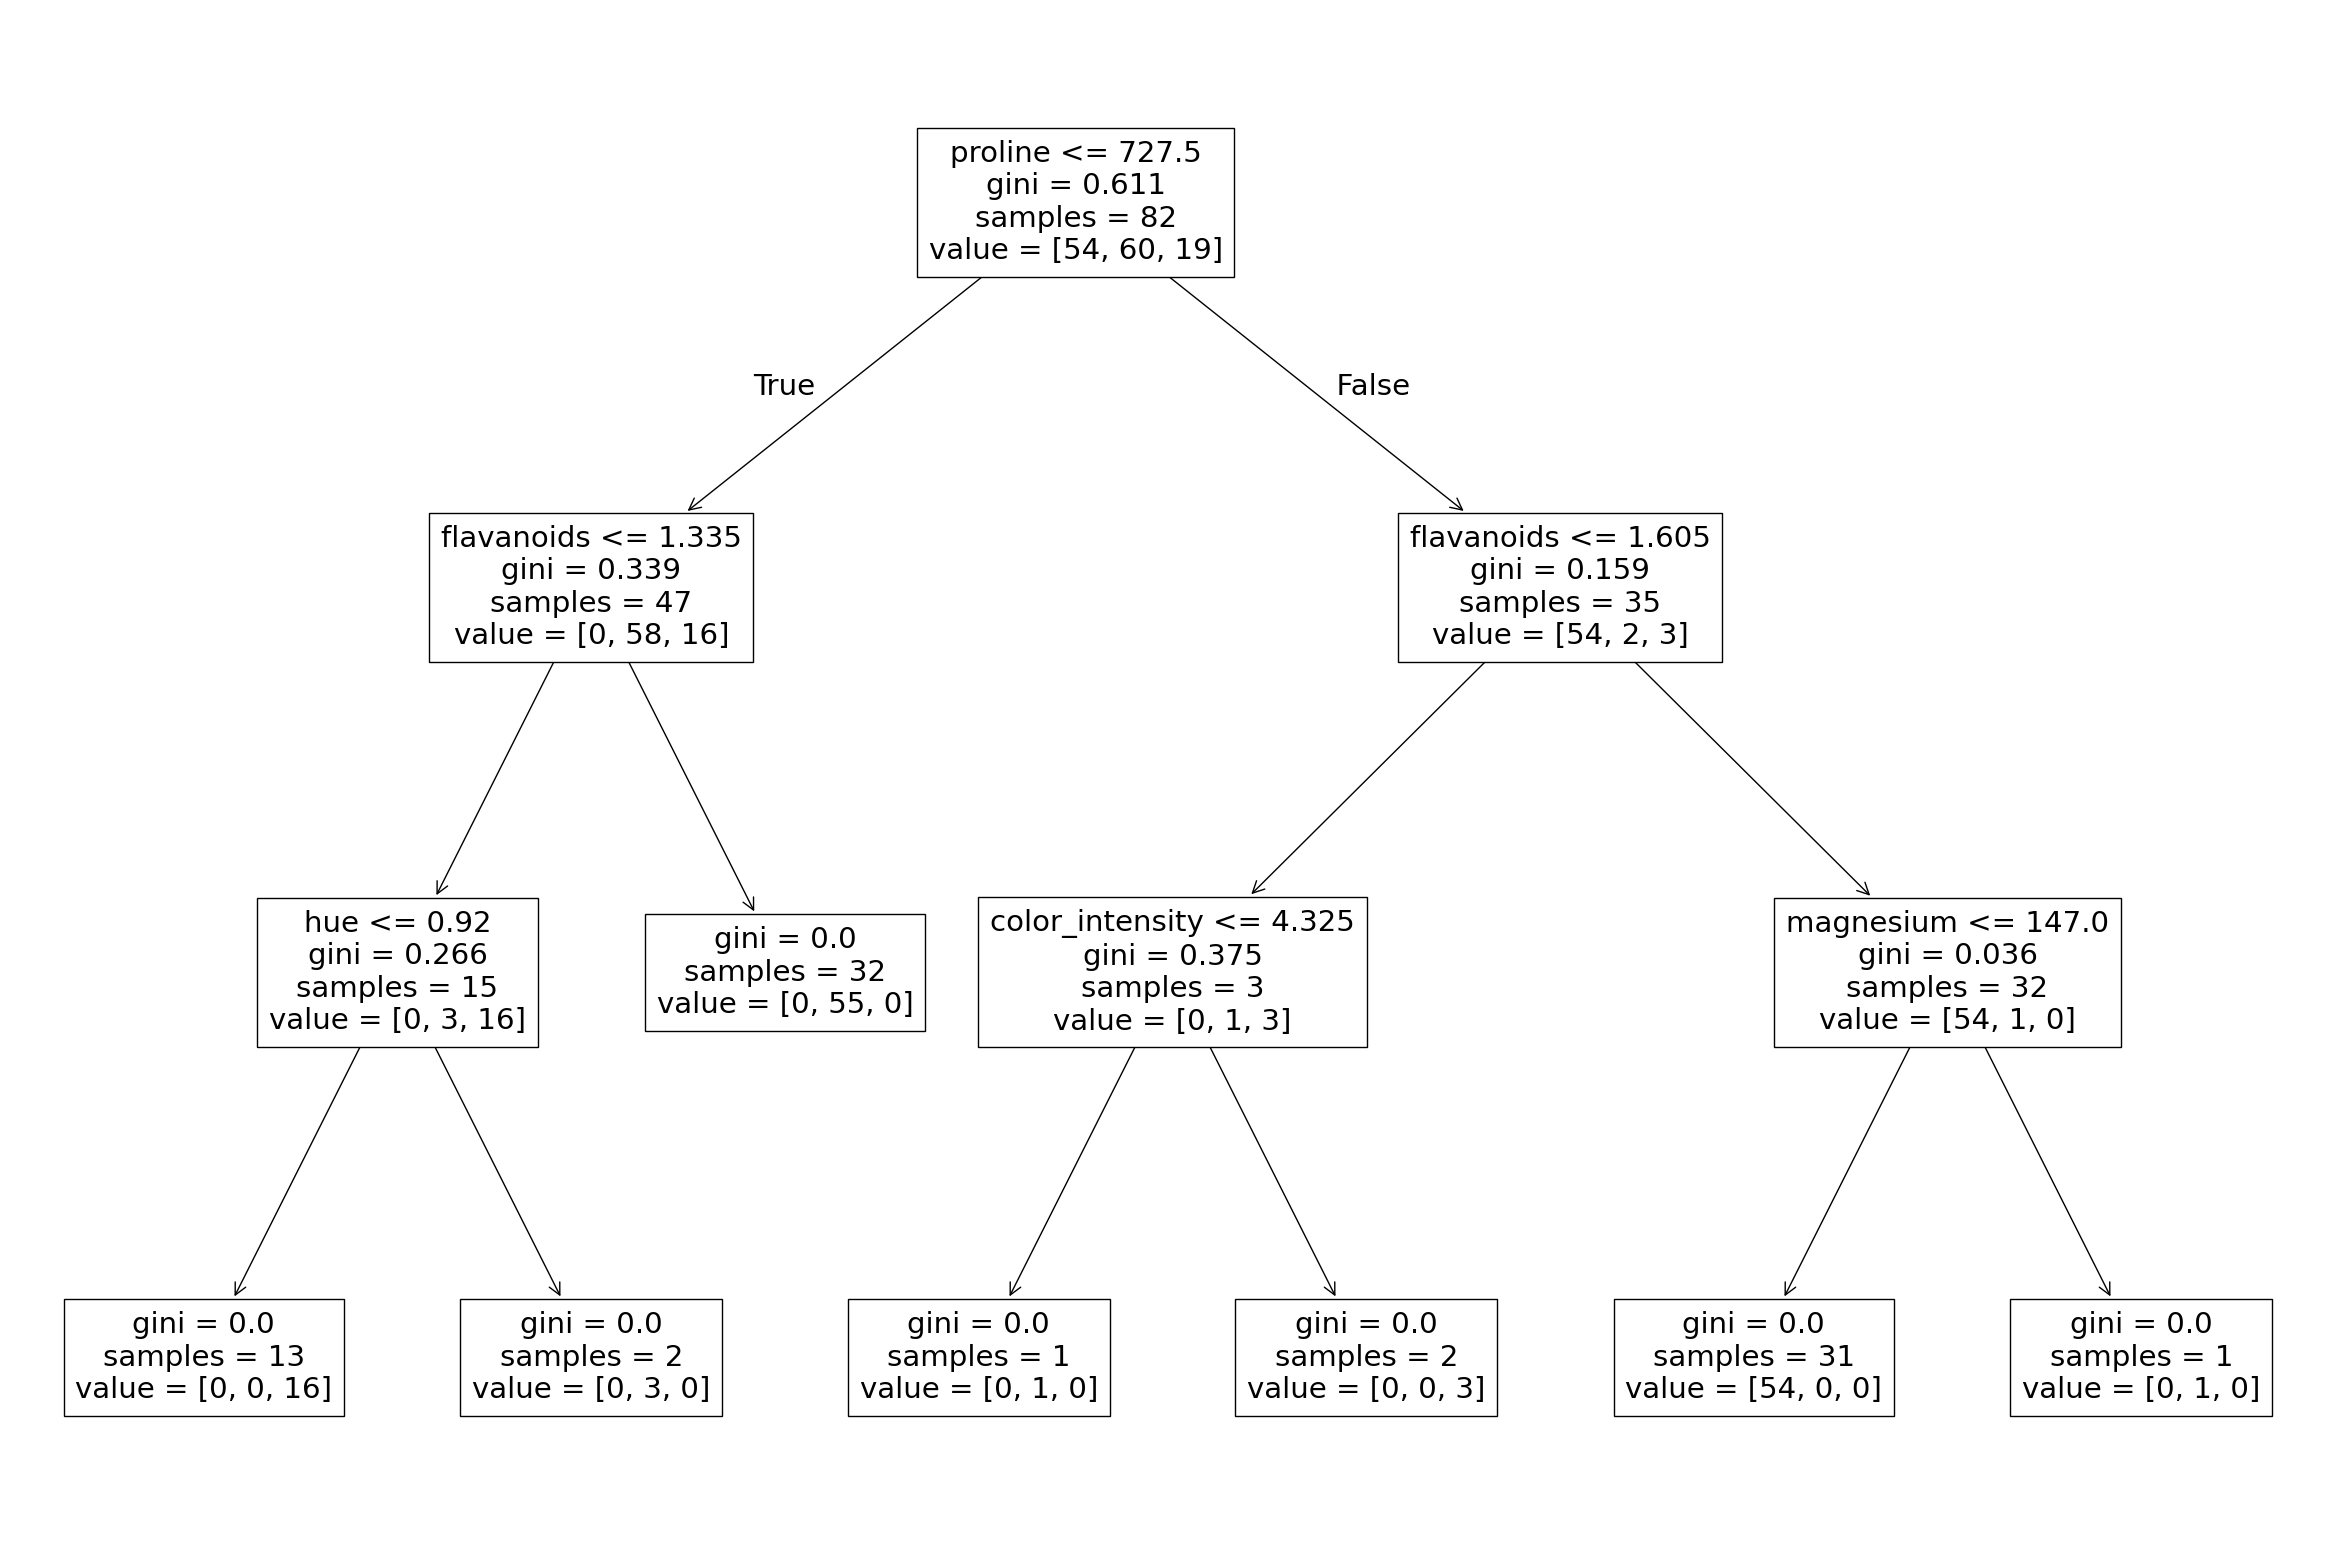

In [44]:
#Bagging Sınıflandırıcısından Karar Ağaçları Oluşturma

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import plot_tree

X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 22)

clf = BaggingClassifier(n_estimators = 12, oob_score = True,random_state = 22)

clf.fit(X_train, y_train)

plt.figure(figsize=(30, 20))

plot_tree(clf.estimators_[0], feature_names = X.columns)

Burada, nihai tahmine oy vermek için kullanılan ilk karar ağacını görebiliriz. Yine, sınıflandırıcı indeksini değiştirerek, bir araya getirilmiş ağaçların her birini görebilirsiniz.

# **Çapraz Doğrulama**
Modelleri ayarlarken amacımız, daha önce görülmemiş veriler üzerinde genel model performansını artırmaktır. Hiperparametre ayarlaması, test setlerinde çok daha iyi performans sağlayabilir. Bununla birlikte, parametreleri test setine göre optimize etmek, bilgi sızıntısına yol açarak modelin daha önce görülmemiş verilerde daha kötü performans göstermesine neden olabilir. Bunu düzeltmek için çapraz doğrulama yapabiliriz.

Bilgisayar görüşü (CV) kavramını daha iyi anlamak için, iris veri kümesi üzerinde farklı yöntemler uygulayacağız. Öncelikle verileri yükleyip ayıralım.

from sklearn import datasets

X, y = datasets.load_iris(return_X_y=True)

Çapraz doğrulama için birçok yöntem vardır, biz k-katlı çapraz doğrulama ile başlayacağız.

# **K Katlama**
Modelde kullanılan eğitim verileri, modeli doğrulamak için kullanılacak k sayıda daha küçük kümeye bölünür. Ardından model, eğitim kümesinin k-1 katmanında eğitilir. Geri kalan katman ise modeli değerlendirmek için doğrulama kümesi olarak kullanılır.

İris çiçeğinin farklı türlerini sınıflandırmaya çalışacağımız için bir sınıflandırıcı modeline ihtiyacımız olacak; bu alıştırma için bir model kullanacağız DecisionTreeClassifier. Ayrıca, CV modüllerini de içe aktarmamız gerekecek sklearn.

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score

Veriler yüklendikten sonra artık değerlendirme için bir model oluşturabilir ve uygulayabiliriz.

clf = DecisionTreeClassifier(random_state=42)

Şimdi modelimizi değerlendirelim ve her k- katlamalı algoritma üzerinde nasıl performans gösterdiğine bakalım.

k_folds = KFold(n_splits = 5)

scores = cross_val_score(clf, X, y, cv = k_folds)

Ayrıca, tüm katmanların puanlarını ortalamasını alarak CV'nin genel performansını görmek de iyi bir uygulamadır.

In [45]:
#k-fold CV'yi çalıştırın:

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score

X, y = datasets.load_iris(return_X_y=True)

clf = DecisionTreeClassifier(random_state=42)

k_folds = KFold(n_splits = 5)

scores = cross_val_score(clf, X, y, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [1.         1.         0.83333333 0.93333333 0.8       ]
Average CV Score:  0.9133333333333333
Number of CV Scores used in Average:  5


# **Katmanlı K-Katlama**
Sınıfların dengesiz olduğu durumlarda, hem eğitim hem de doğrulama kümelerindeki dengesizliği hesaba katmanın bir yoluna ihtiyacımız var. Bunu yapmak için hedef sınıfları katmanlara ayırabiliriz; bu da her iki kümenin de tüm sınıflardan eşit oranda içereceği anlamına gelir.

In [46]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

X, y = datasets.load_iris(return_X_y=True)

clf = DecisionTreeClassifier(random_state=42)

sk_folds = StratifiedKFold(n_splits = 5)

scores = cross_val_score(clf, X, y, cv = sk_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.96666667 0.96666667 0.9        0.93333333 1.        ]
Average CV Score:  0.9533333333333334
Number of CV Scores used in Average:  5


Katlama sayısı aynı kalırken, katmanlı sınıfların mevcut olduğundan emin olunduğunda ortalama CV, temel k-katlamalı algoritmaya göre artmaktadır.

# **Tekli Çıkarma (LOO)**
K-katlı LeaveOneOut yönteminde olduğu gibi eğitim veri setindeki bölme sayısını seçmek yerine, doğrulama için 1 gözlem ve eğitim için n-1 gözlem kullanın. Bu yöntem kapsamlı bir tekniktir.

In [47]:
#LOO CV'yi çalıştırın:

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import LeaveOneOut, cross_val_score

X, y = datasets.load_iris(return_X_y=True)

clf = DecisionTreeClassifier(random_state=42)

loo = LeaveOneOut()

scores = cross_val_score(clf, X, y, cv = loo)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
Average CV Score:  0.94
Number of CV Scores used in Average:  150


Gözlemlediğimiz kadarıyla, gerçekleştirilen çapraz doğrulama puanlarının sayısı, veri kümesindeki gözlem sayısına eşittir. Bu durumda iris veri kümesinde 150 gözlem bulunmaktadır.

Ortalama CV puanı %94'tür.

# **Leave-P-Out (LPO)**
Leave-P-Out yöntemi, Leave-One-Out yöntemine göre ince bir farklılık gösterir; doğrulama kümemizde kullanılacak p sayısını seçebiliriz.

In [48]:
#LPO CV'yi çalıştırın:

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import LeavePOut, cross_val_score

X, y = datasets.load_iris(return_X_y=True)

clf = DecisionTreeClassifier(random_state=42)

lpo = LeavePOut(p=2)

scores = cross_val_score(clf, X, y, cv = lpo)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [1. 1. 1. ... 1. 1. 1.]
Average CV Score:  0.9382997762863534
Number of CV Scores used in Average:  11175


Gördüğümüz gibi, bu kapsamlı bir yöntem olup, ap = 2 olsa bile, Tek Tek Çıkarma yöntemine kıyasla çok daha fazla puan hesaplanmaktadır ve buna rağmen yaklaşık olarak aynı ortalama CV puanı elde edilmektedir.



In [49]:
#Çalıştır Shuffle Split CV:

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import ShuffleSplit, cross_val_score

X, y = datasets.load_iris(return_X_y=True)

clf = DecisionTreeClassifier(random_state=42)

ss = ShuffleSplit(train_size=0.6, test_size=0.3, n_splits = 5)

scores = cross_val_score(clf, X, y, cv = ss)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.95555556 0.97777778 0.95555556 0.91111111 0.91111111]
Average CV Score:  0.9422222222222223
Number of CV Scores used in Average:  5


# **Son Notlar**
Bunlar, modellere uygulanabilecek çapraz doğrulama yöntemlerinden sadece birkaçıdır. Daha birçok çapraz doğrulama sınıfı mevcuttur ve çoğu modelin kendi sınıfı vardır. Daha fazla çapraz doğrulama seçeneği için sklearn'ün çapraz doğrulama özelliğine göz atın.

# **AUC - ROC Eğrisi**
Sınıflandırmada birçok farklı değerlendirme ölçütü vardır. En popüler olanı , modelin ne sıklıkla doğru tahmin yaptığını ölçen doğruluktur . Bu harika bir ölçüttür çünkü anlaşılması kolaydır ve en doğru tahminleri elde etmek genellikle istenir. Başka bir değerlendirme ölçütü kullanmayı düşünebileceğiniz bazı durumlar da vardır.

Bir diğer yaygın ölçüt ise AUC , yani alıcı işletim karakteristik ( ROC ) eğrisinin altındaki alandır. Alıcı işletim karakteristik eğrisi, farklı sınıflandırma eşiklerinde doğru pozitif ( TP ) oranını yanlış pozitif ( FP ) oranına karşı çizer. Eşikler, ikili sınıflandırmada iki sınıfı ayıran farklı olasılık kesme noktalarıdır. Bir modelin sınıfları ne kadar iyi ayırdığını bize olasılık kullanarak gösterir.

Dengesiz Veriler
Verilerimizin çoğunluğunun tek bir değere sahip olduğu dengesiz bir veri setimiz olduğunu varsayalım. Çoğunluk sınıfını tahmin ederek model için yüksek doğruluk elde edebiliriz.

In [50]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

n = 10000
ratio = .95
n_0 = int((1-ratio) * n)
n_1 = int(ratio * n)

y = np.array([0] * n_0 + [1] * n_1)
# below are the probabilities obtained from a hypothetical model that always predicts the majority class
# probability of predicting class 1 is going to be 100%
y_proba = np.array([1]*n)
y_pred = y_proba > .5

print(f'accuracy score: {accuracy_score(y, y_pred)}')
cf_mat = confusion_matrix(y, y_pred)
print('Confusion matrix')
print(cf_mat)
print(f'class 0 accuracy: {cf_mat[0][0]/n_0}')
print(f'class 1 accuracy: {cf_mat[1][1]/n_1}')

accuracy score: 0.95
Confusion matrix
[[   0  500]
 [   0 9500]]
class 0 accuracy: 0.0
class 1 accuracy: 1.0


Çok yüksek bir doğruluk oranı elde etmemize rağmen, model veriler hakkında hiçbir bilgi sağlamadığından kullanışlı değil. Sınıf 1'i %100 oranında doğru tahmin ederken, sınıf 0'ı %0 oranında yanlış tahmin ediyoruz. Doğruluktan ödün vererek, iki sınıfı bir nebze de olsa ayırabilen bir modele sahip olmak daha iyi olabilir.

In [ ]:
# below are the probabilities obtained from a hypothetical model that doesn't always predict the mode
y_proba_2 = np.array(
    np.random.uniform(0, .7, n_0).tolist() +
    np.random.uniform(.3, 1, n_1).tolist()
)
y_pred_2 = y_proba_2 > .5

print(f'accuracy score: {accuracy_score(y, y_pred_2)}')
cf_mat = confusion_matrix(y, y_pred_2)
print('Confusion matrix')
print(cf_mat)
print(f'class 0 accuracy: {cf_mat[0][0]/n_0}')
print(f'class 1 accuracy: {cf_mat[1][1]/n_1}')

İkinci tahmin setinde, ilkine kıyasla daha düşük bir doğruluk puanına sahip olsak da, her sınıf için doğruluk daha dengeli. Doğruluk oranını bir değerlendirme ölçütü olarak kullanırsak, veriler hakkında bize hiçbir şey söylemese bile, ilk modeli ikincisinden daha yüksek puanlandırırız.

Bu gibi durumlarda, AUC gibi başka bir değerlendirme ölçütü kullanmak tercih edilir.

In [51]:
import matplotlib.pyplot as plt

def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

model 1 AUC score: 0.5


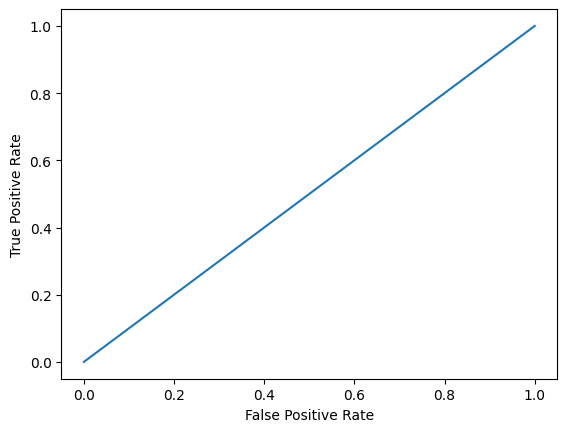

In [53]:
#Model 1:

plot_roc_curve(y, y_proba)
print(f'model 1 AUC score: {roc_auc_score(y, y_proba)}')

In [59]:
#Model 2:
plot_roc_curve(y, y_proba_2)
print(f'model 1 AUC score: {roc_auc_score(y, y_proba_2)}')

NameError: name 'y_proba_2' is not defined

Model 2 AUC skoru: 0.8270551578947367

Yaklaşık 0,5'lik bir AUC puanı, modelin iki sınıf arasında ayrım yapamadığı ve eğrinin eğimi 1 olan bir çizgiye benzeyeceği anlamına gelir. 1'e daha yakın bir AUC puanı, modelin iki sınıfı ayırma yeteneğine sahip olduğu ve eğrinin grafiğin sol üst köşesine daha yakın olacağı anlamına gelir.

# **Olasılıklar**

AUC, sınıf tahminlerinin olasılıklarını kullanan bir ölçüt olduğundan, benzer doğruluk oranlarına sahip olsalar bile, daha yüksek AUC puanına sahip bir modele, daha düşük puana sahip bir modele göre daha fazla güvenebiliriz.

Aşağıdaki verilerde, varsayımsal modellerden elde edilen iki olasılık kümesi bulunmaktadır. Birincisinde, iki sınıfı tahmin ederken olasılıklar o kadar "güvenilir" değildir (olasılıklar 0,5'e yakındır). İkincisinde ise, iki sınıfı tahmin ederken olasılıklar daha "güvenilir"dir (olasılıklar 0 veya 1'in uç değerlerine yakındır).

In [60]:
import numpy as np

n = 10000
y = np.array([0] * n + [1] * n)
#
y_prob_1 = np.array(
    np.random.uniform(.25, .5, n//2).tolist() +
    np.random.uniform(.3, .7, n).tolist() +
    np.random.uniform(.5, .75, n//2).tolist()
)
y_prob_2 = np.array(
    np.random.uniform(0, .4, n//2).tolist() +
    np.random.uniform(.3, .7, n).tolist() +
    np.random.uniform(.6, 1, n//2).tolist()
)

print(f'model 1 accuracy score: {accuracy_score(y, y_prob_1>.5)}')
print(f'model 2 accuracy score: {accuracy_score(y, y_prob_2>.5)}')

print(f'model 1 AUC score: {roc_auc_score(y, y_prob_1)}')
print(f'model 2 AUC score: {roc_auc_score(y, y_prob_2)}')

model 1 accuracy score: 0.75555
model 2 accuracy score: 0.75495
model 1 AUC score: 0.78040775
model 2 AUC score: 0.8606397700000001


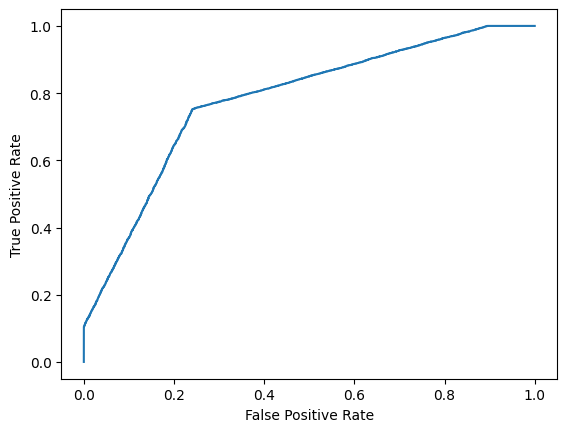

In [61]:
#Grafik modeli 1:

plot_roc_curve(y, y_prob_1)

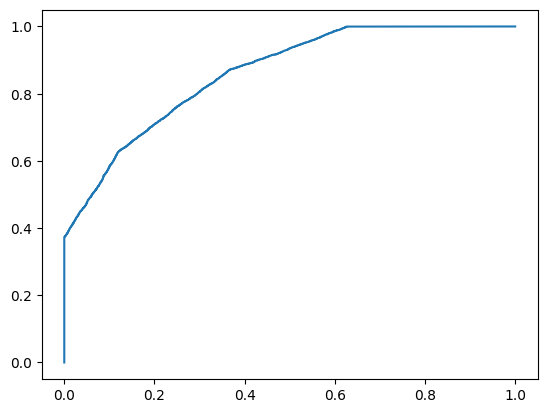

In [62]:
#Grafik modeli 2:

fpr, tpr, thresholds = roc_curve(y, y_prob_2)
plt.plot(fpr, tpr)

İki modelin doğruluk oranları benzer olsa da, daha yüksek AUC puanına sahip model, tahmin edilen olasılığı dikkate aldığı için daha güvenilir olacaktır. Gelecekteki verileri tahmin ederken daha yüksek doğruluk elde etme olasılığı daha yüksektir.

# **KNN**
KNN, sınıflandırma veya regresyon görevlerinde kullanılabilen ve ayrıca eksik değerlerin doldurulmasında da sıklıkla kullanılan basit, denetimli bir makine öğrenimi (ML) algoritmasıdır. Algoritma, belirli bir veri noktasına en yakın gözlemlerin veri kümesindeki en "benzer" gözlemler olduğu fikrine dayanır ve bu nedenle, en yakın mevcut noktaların değerlerine göre öngörülemeyen noktaları sınıflandırabiliriz. Kullanıcı, K değerini seçerek algoritmada kullanılacak yakın gözlem sayısını belirleyebilir.

Burada, KNN algoritmasının sınıflandırma için nasıl uygulanacağını ve K'nin farklı değerlerinin sonuçları nasıl etkilediğini göstereceğiz .

Nasıl çalışıyor?
K, kullanılacak en yakın komşuların sayısıdır. Sınıflandırma için, yeni bir gözlemin hangi sınıfa ait olması gerektiğine karar vermek için çoğunluk oylaması kullanılır. Daha büyük K değerleri genellikle aykırı değerlere karşı daha dayanıklıdır ve çok küçük değerlere göre daha istikrarlı karar sınırları üretir ( K=3 , istenmeyen sonuçlar üretebilecek K=1'den daha iyi olur ).

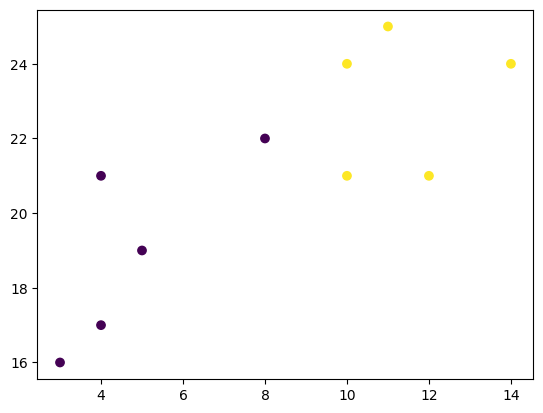

In [63]:
#Öncelikle bazı veri noktalarını görselleştirerek başlayalım:

import matplotlib.pyplot as plt

x = [4, 5, 10, 4, 3, 11, 14 , 8, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]
classes = [0, 0, 1, 0, 0, 1, 1, 0, 1, 1]

plt.scatter(x, y, c=classes)
plt.show()

Şimdi K=1 değeriyle KNN algoritmasını uyguluyoruz:

Ve bunu yeni bir veri noktasını sınıflandırmak için kullanın:

In [65]:
from sklearn.neighbors import KNeighborsClassifier

data = list(zip(x, y))
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(data, classes)

KNeighborsClassifier(n_neighbors=1)

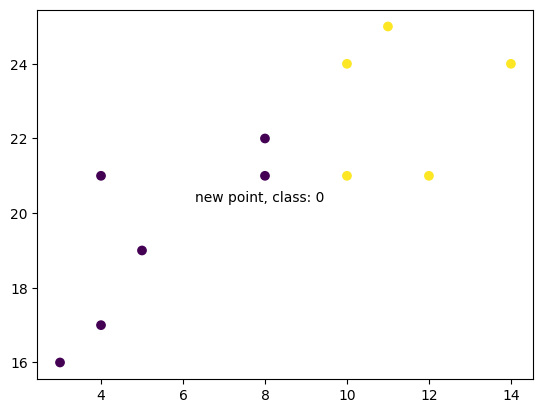

In [66]:
new_x = 8
new_y = 21
new_point = [(new_x, new_y)]

prediction = knn.predict(new_point)

plt.scatter(x + [new_x], y + [new_y], c=classes + [prediction[0]])
plt.text(x=new_x-1.7, y=new_y-0.7, s=f"new point, class: {prediction[0]}")
plt.show()

Ve bunu yeni bir veri noktasını sınıflandırmak için kullanın:

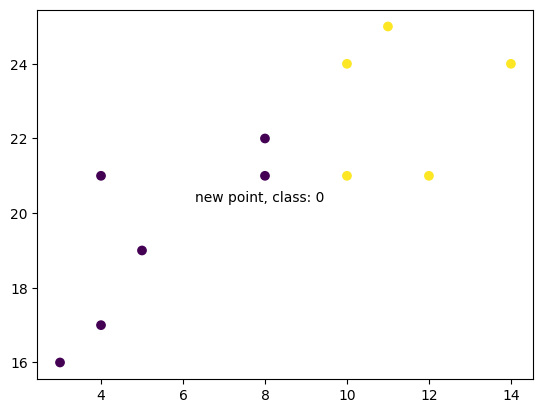

In [67]:
new_x = 8
new_y = 21
new_point = [(new_x, new_y)]

prediction = knn.predict(new_point)

plt.scatter(x + [new_x], y + [new_y], c=classes + [prediction[0]])
plt.text(x=new_x-1.7, y=new_y-0.7, s=f"new point, class: {prediction[0]}")
plt.show()

Şimdi aynı işlemi, tahmini değiştiren daha yüksek bir K değeriyle yapıyoruz:

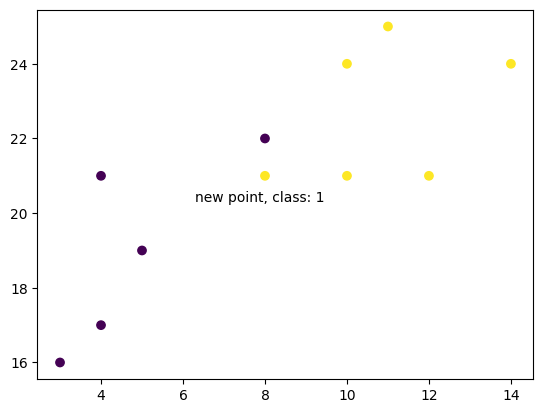

In [68]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(data, classes)

prediction = knn.predict(new_point)

plt.scatter(x + [new_x], y + [new_y], c=classes + [prediction[0]])
plt.text(x=new_x-1.7, y=new_y-0.7, s=f"new point, class: {prediction[0]}")
plt.show()

# **Örnek Açıklaması**

İhtiyaç duyduğunuz modülleri içe aktarın.

Matplotlib modülü hakkında daha fazla bilgiyi "Matplotlib Eğitimi" kılavuzumuzda bulabilirsiniz .

scikit-learn, Python'da makine öğrenimi için popüler bir kütüphanedir.

import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

Veri kümesindeki değişkenlere benzeyen diziler oluşturun. İki giriş özelliğimiz ( xve y) ve bir hedef sınıfımız ( class) var. Hedef sınıfımızla önceden etiketlenmiş giriş özellikleri, yeni verilerin sınıfını tahmin etmek için kullanılacaktır. Burada yalnızca iki giriş özelliği kullandığımızı, ancak bu yöntemin herhangi bir sayıda değişkenle çalışacağını unutmayın:

x = [4, 5, 10, 4, 3, 11, 14 , 8, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]
classes = [0, 0, 1, 0, 0, 1, 1, 0, 1, 1]

Giriş özelliklerini bir nokta kümesine dönüştürün:

data = list(zip(x, y))
print(data)

Sonuç:
[(4, 21), (5, 19), (10, 24), (4, 17), (3, 16), (11, 25), (14, 24), (8, 22), (10, 21), (12, 21)]

Giriş özelliklerini ve hedef sınıfı kullanarak, en yakın 1 komşuyu kullanan bir KNN modeli oluşturduk:

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(data, classes)

Daha sonra, aynı KNN nesnesini kullanarak yeni, öngörülemeyen veri noktalarının sınıfını tahmin edebiliriz. Önce yeni x ve y özelliklerini oluştururuz ve ardından knn.predict()yeni veri noktasını çağırarak 0 veya 1 sınıfını elde ederiz:

new_x = 8
new_y = 21
new_point = [(new_x, new_y)]
prediction = knn.predict(new_point)
print(prediction)

Sonuç:
[0]

Yeni nokta ve sınıfıyla birlikte tüm verileri grafiğe döktüğümüzde, noktanın mavi renkle ve sınıfıyla etiketlendiğini görebiliriz 1. Metin açıklaması ise sadece yeni noktanın konumunu vurgulamak içindir:

plt.scatter(x + [new_x], y + [new_y], c=classes + [prediction[0]])
plt.text(x=new_x-1.7, y=new_y-0.7, s=f"new point, class: {prediction[0]}")
plt.show()

Ancak, komşu sayısını 5'e değiştirdiğimizde, yeni noktamızı sınıflandırmak için kullanılan nokta sayısı değişir. Sonuç olarak, yeni noktanın sınıflandırması da değişir:

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(data, classes)
prediction = knn.predict(new_point)
print(prediction)

Sonuç:
[1]

Yeni noktanın sınıfını eski noktalarla birlikte çizdiğimizde, rengin ilgili sınıf etiketine göre değiştiğini görüyoruz:

plt.scatter(x + [new_x], y + [new_y], c=classes + [prediction[0]])
plt.text(x=new_x-1.7, y=new_y-0.7, s=f"new point, class: {prediction[0]}")
plt.show()